In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.optimize as sp
import scipy.constants as const
plt.rcParams['figure.dpi'] = 150

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
Data_names = []
for (dir_path, dir_names, file_names) in os.walk('./Labday_2_measurements_2'):
    Data_names.extend(file_names)

In [4]:
Data_list = []

for i, Data_name in enumerate(Data_names):
    Data = np.loadtxt('Labday_2_measurements_2/' + Data_name, skiprows = 3)
    Data_list.append(Data)

In [5]:
c_light = const.c
eps0 = const.epsilon_0
T = 0.5
R = 0.5
I_av = [np.mean(i) for i in Data_list]
# Guess values for function
a_guess = (1/4)*c_light*eps0*9.9**2
b_guess = (2*np.pi) #/(600e-7)


In [6]:
Time=Data[:,0]

In [7]:
#plt.figure() #plot raw data
#plt.plot(Time, (Intensity/2)/(c_light*eps0*9.9**2), '.', label = "normalized intensity")
##plt.grid()
#plt.legend()
 # Scale x-axis ticks in terms of π
#pi_ticks = np.arange(0, np.max(Data[:, 0]), np.pi)
# plt.xticks(pi_ticks, labels=[f'{tick / np.pi}$\pi$' for tick in pi_ticks])


/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/usr/lib/python3/dist-packages/scipy/optimize/_minpack_py.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parame

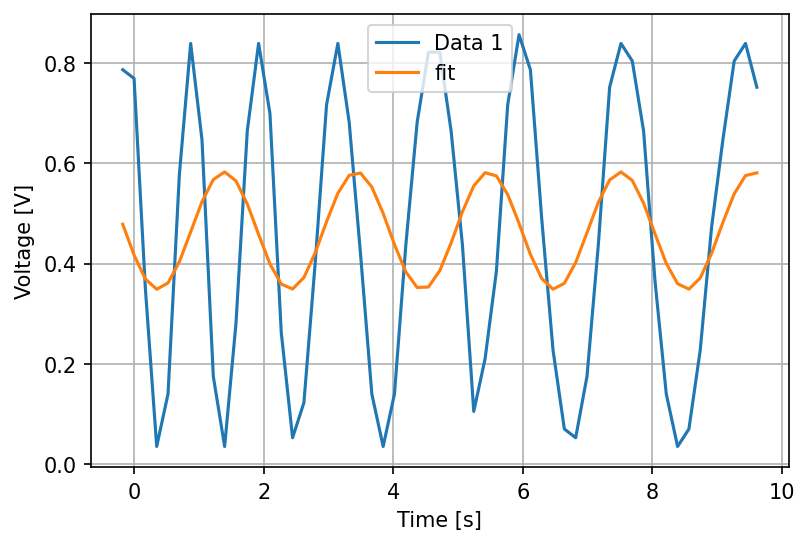

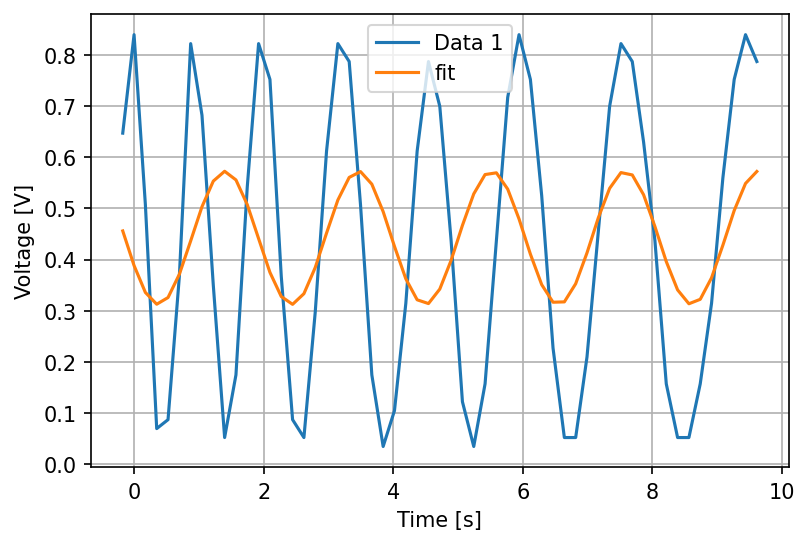

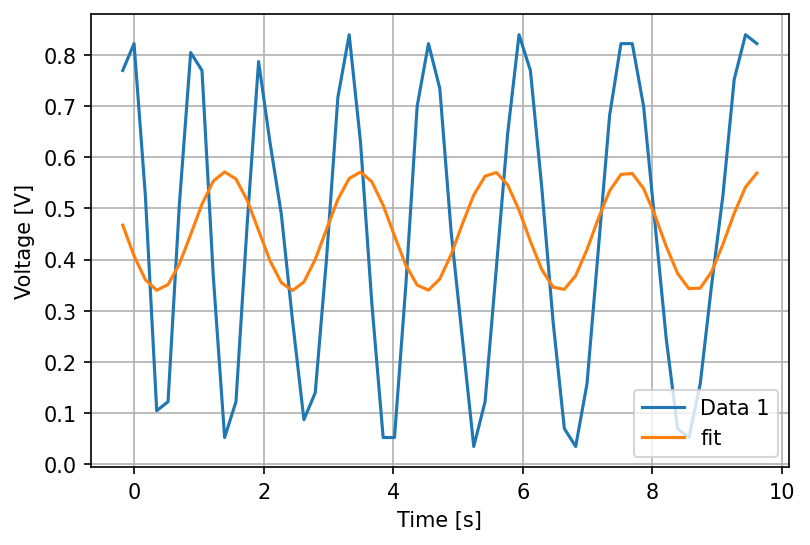

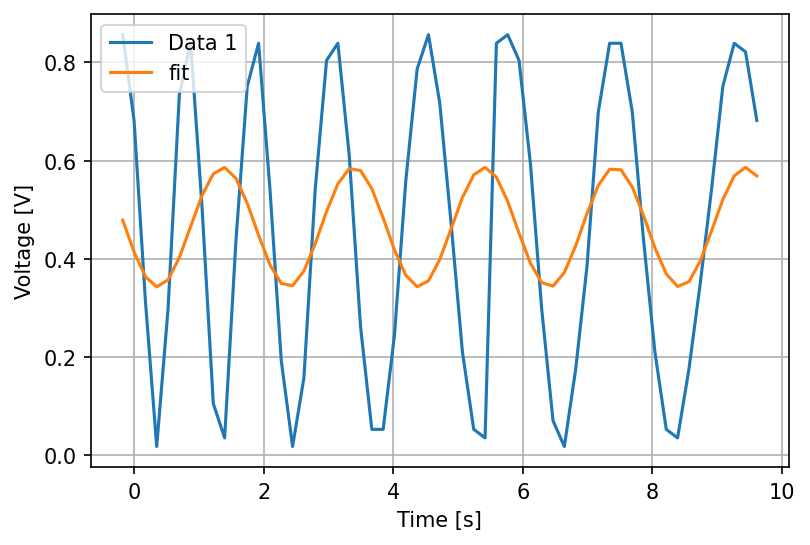

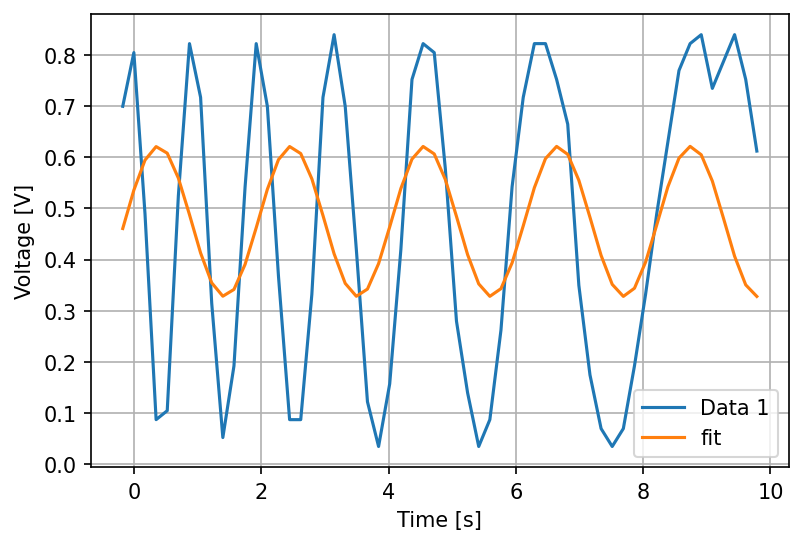

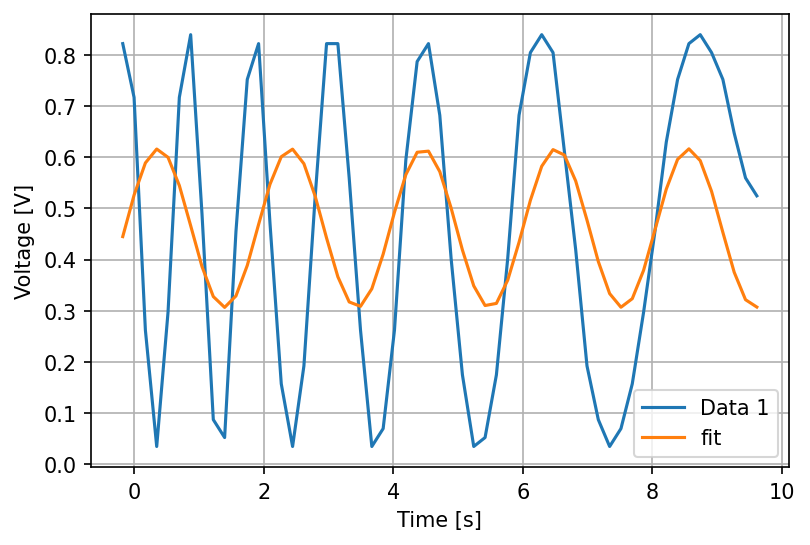

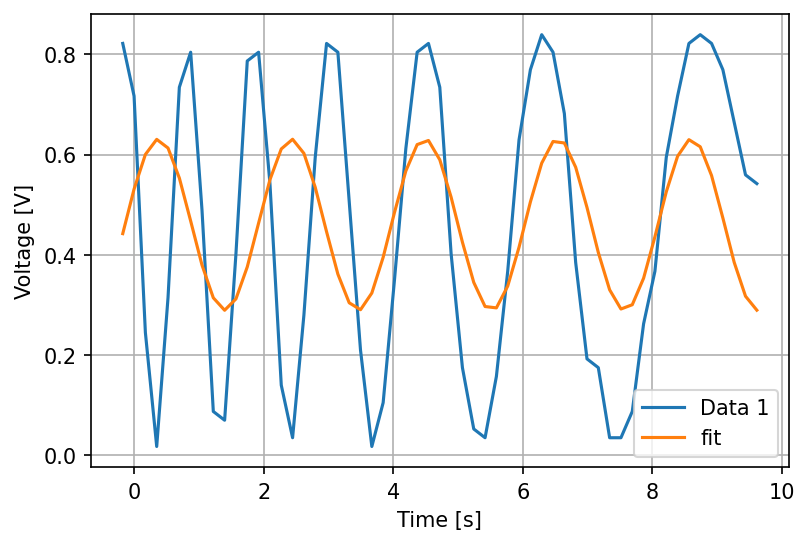

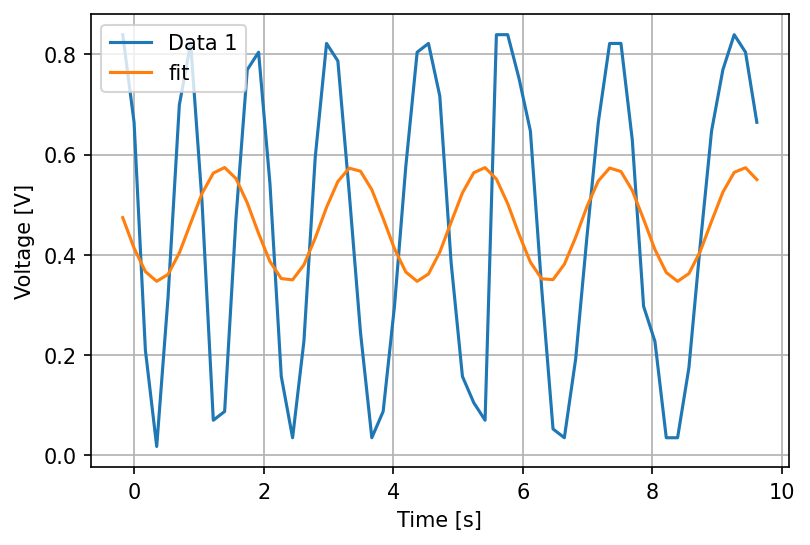

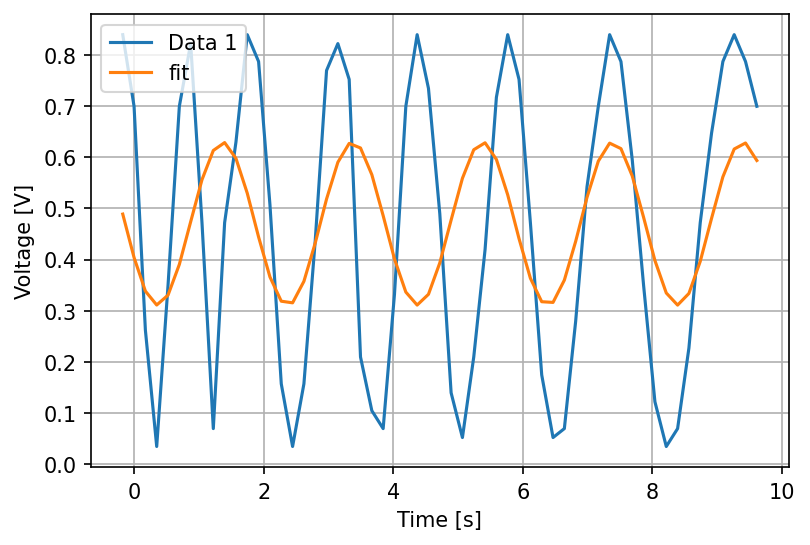

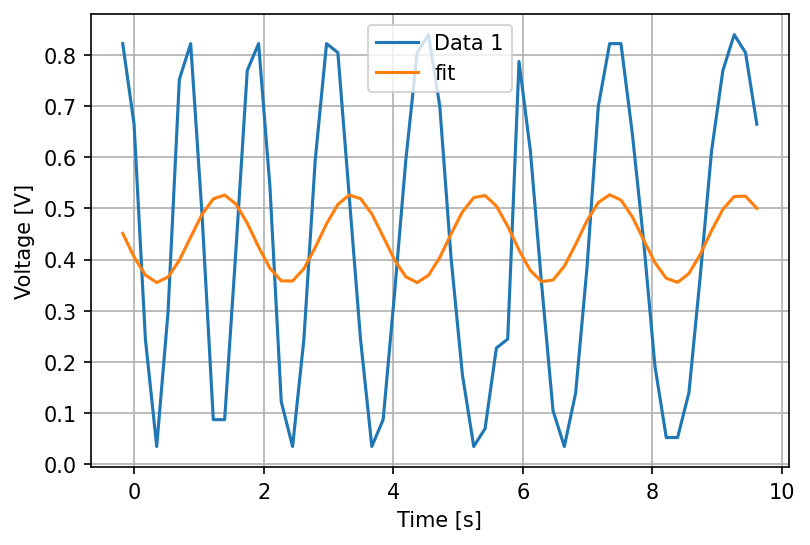

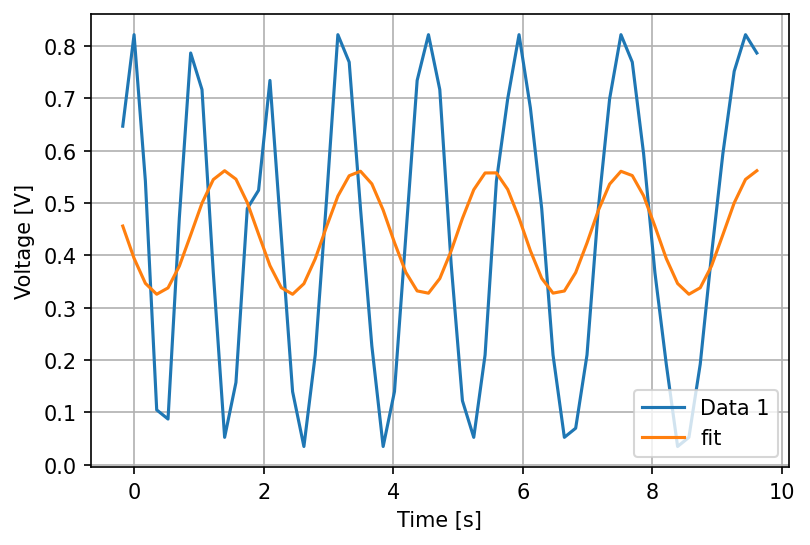

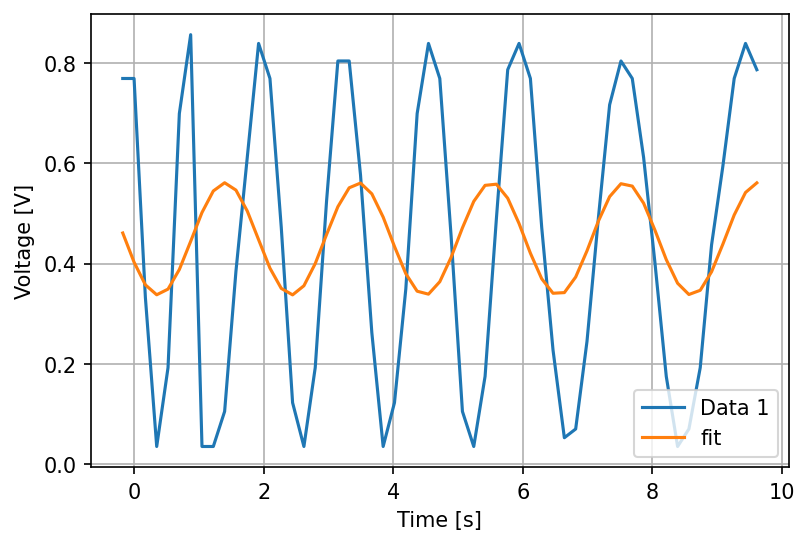

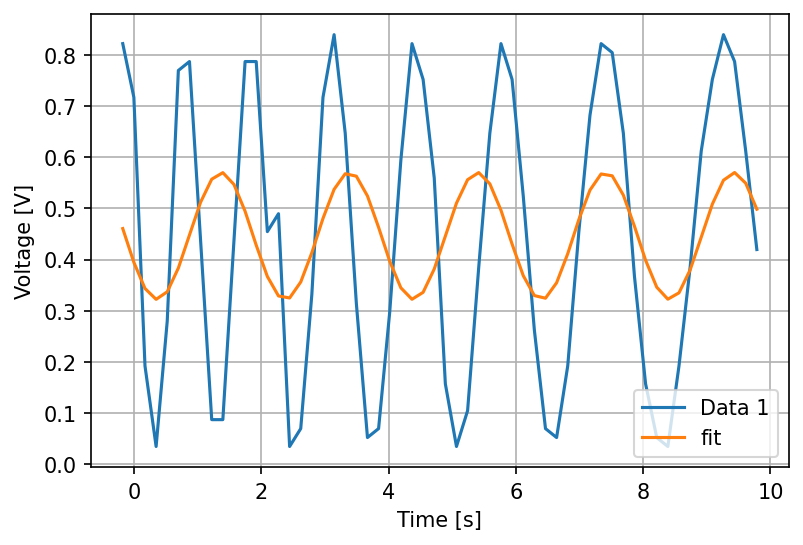

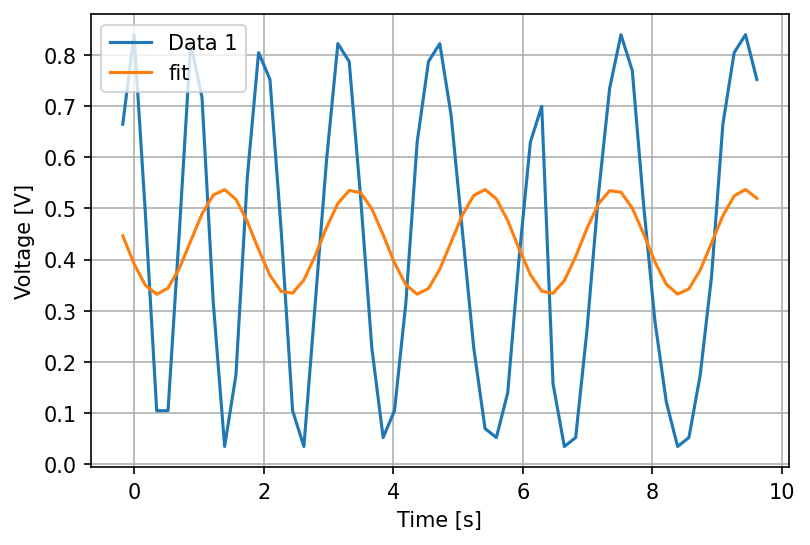

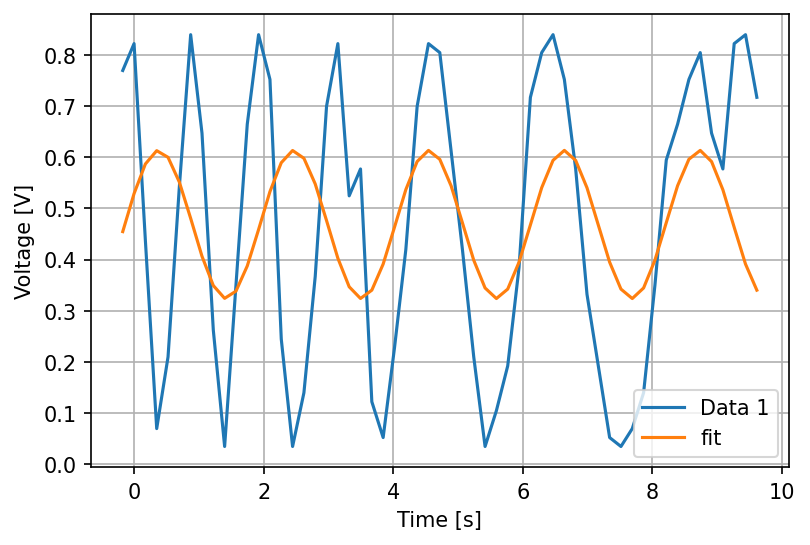

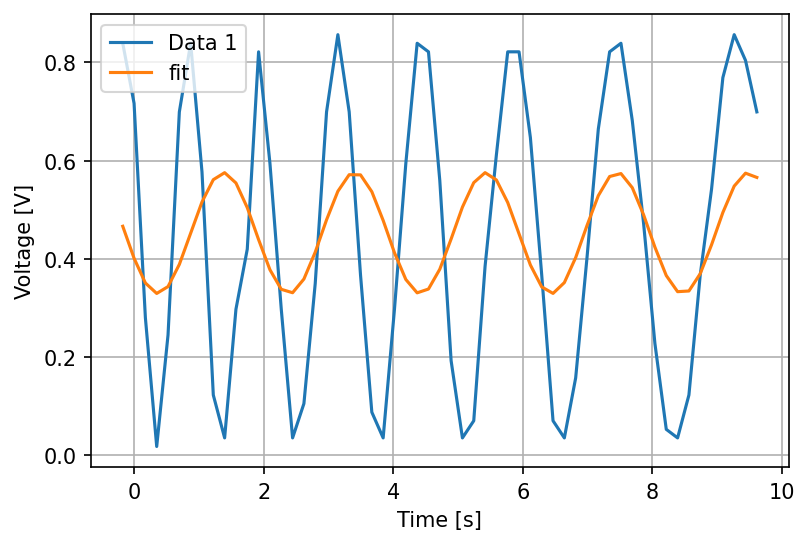

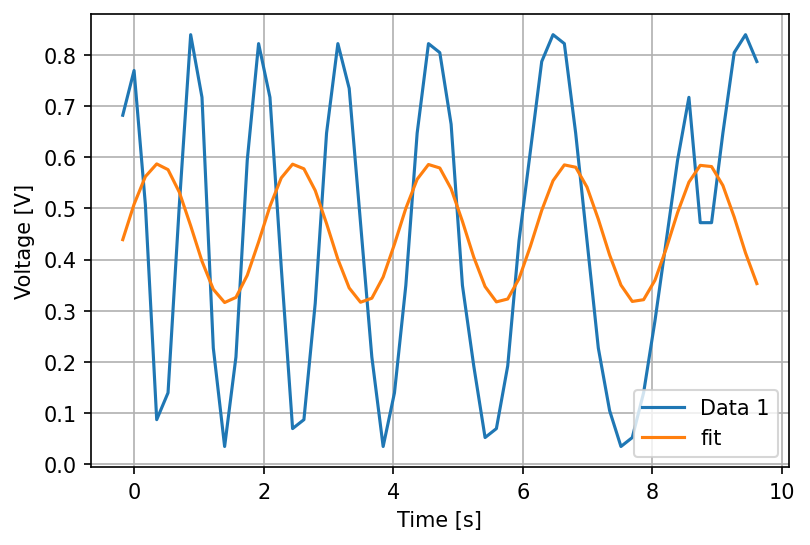

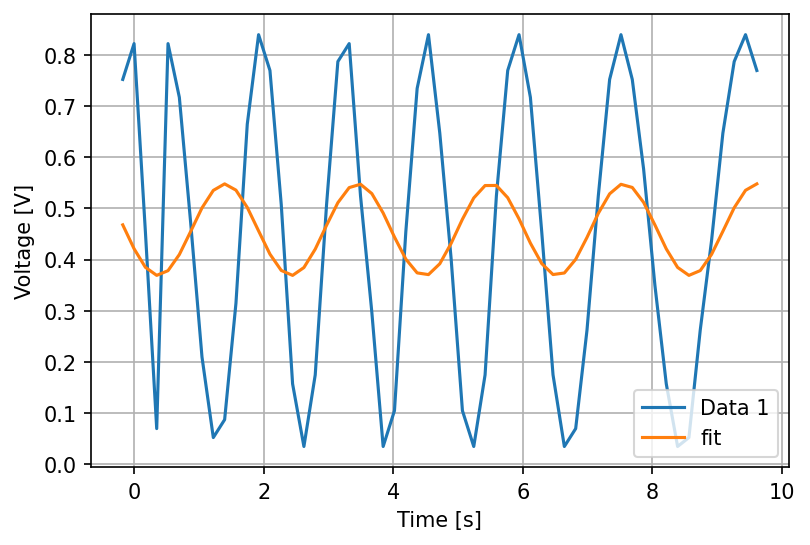

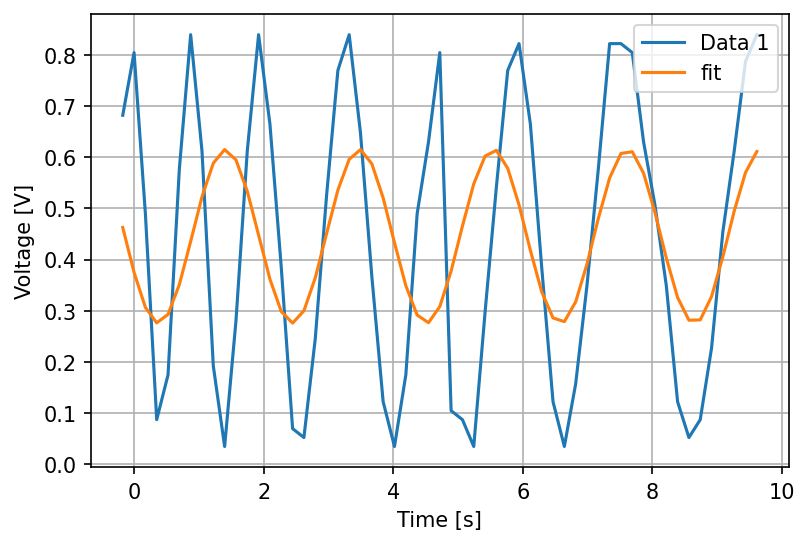

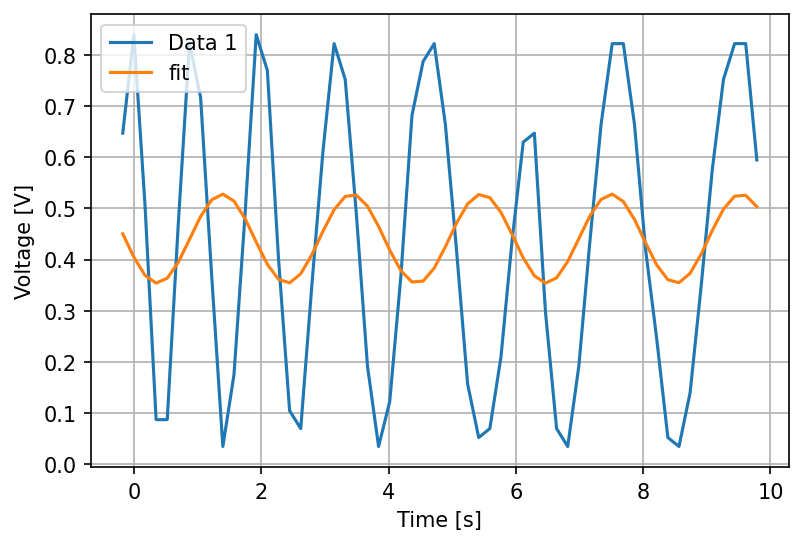

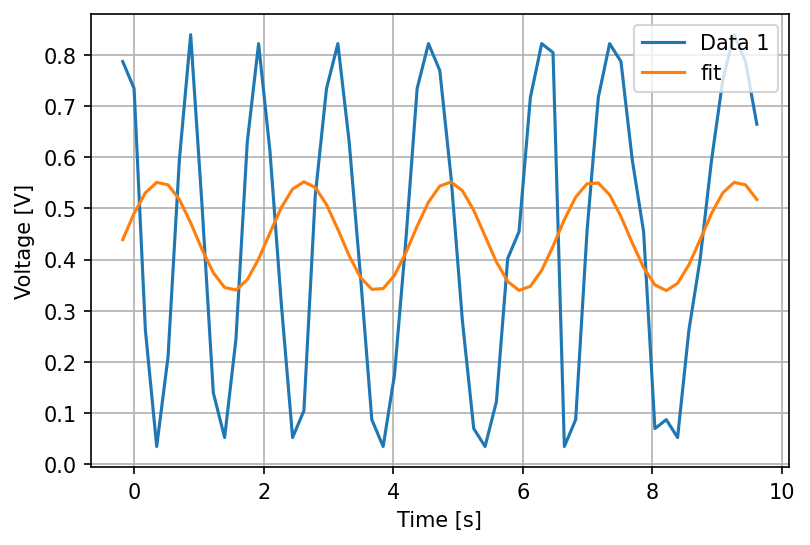

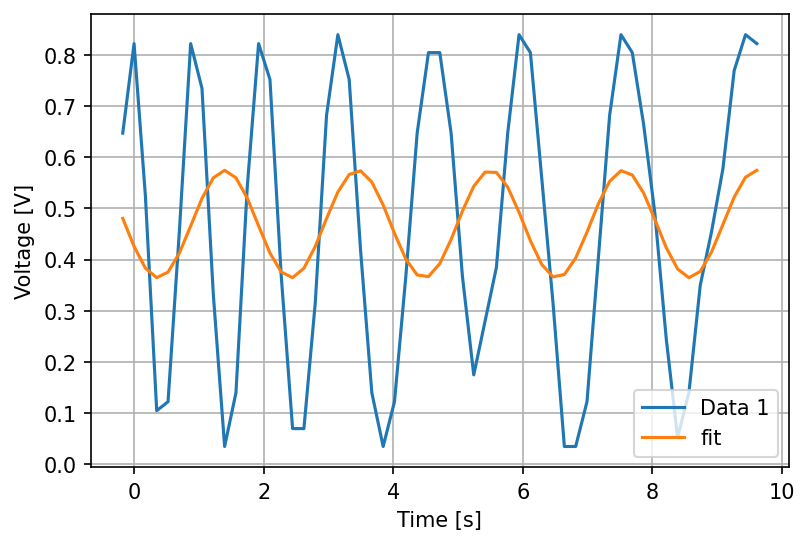

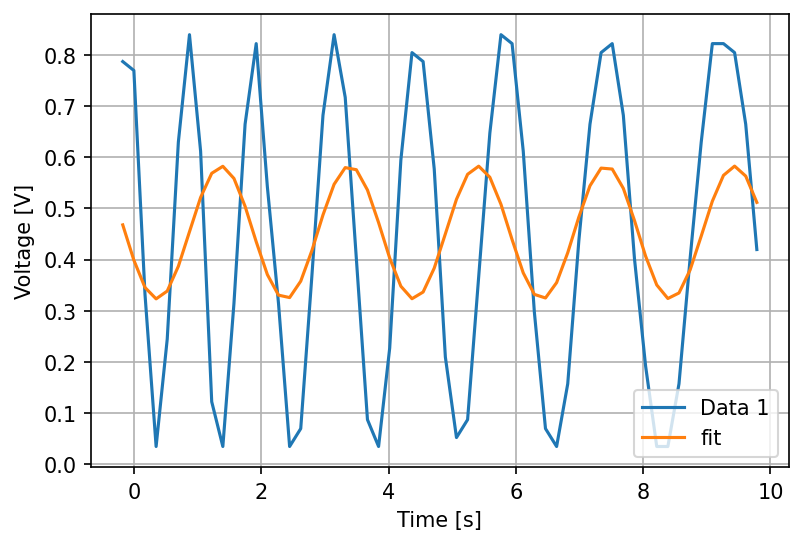

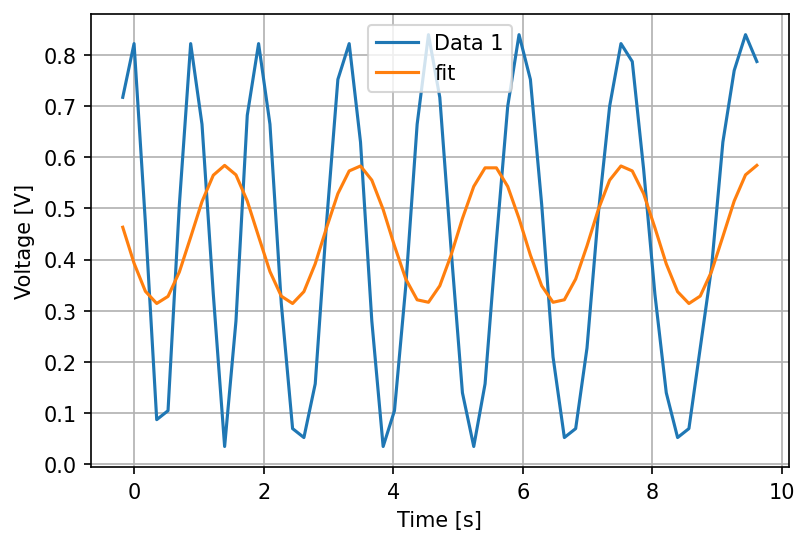

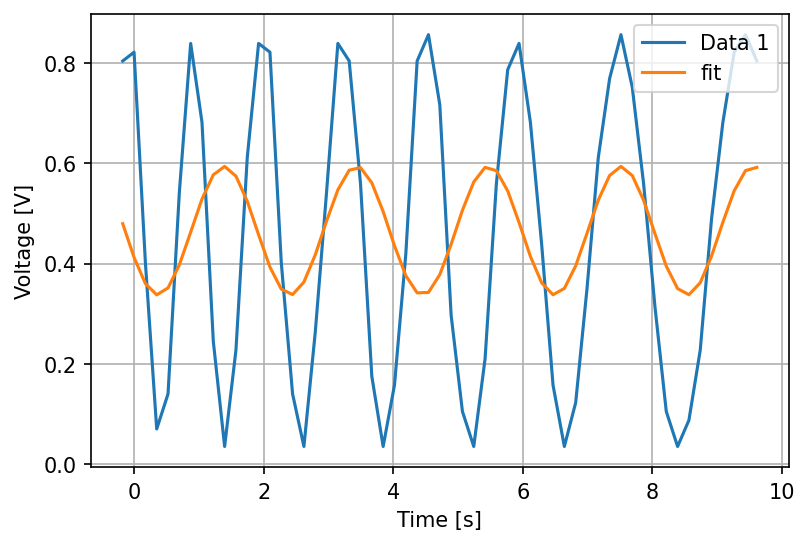

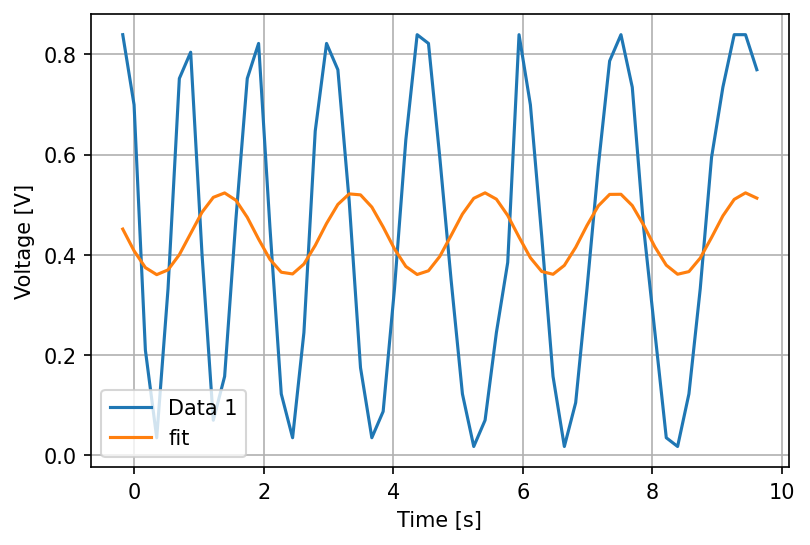

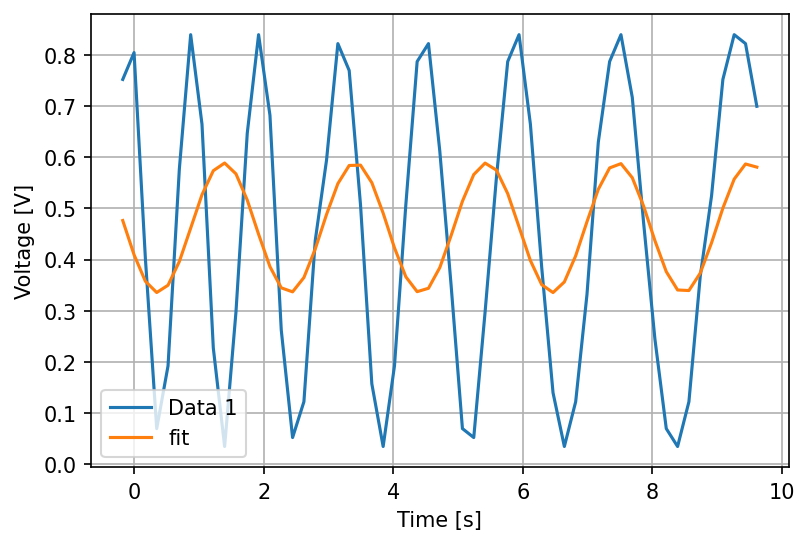

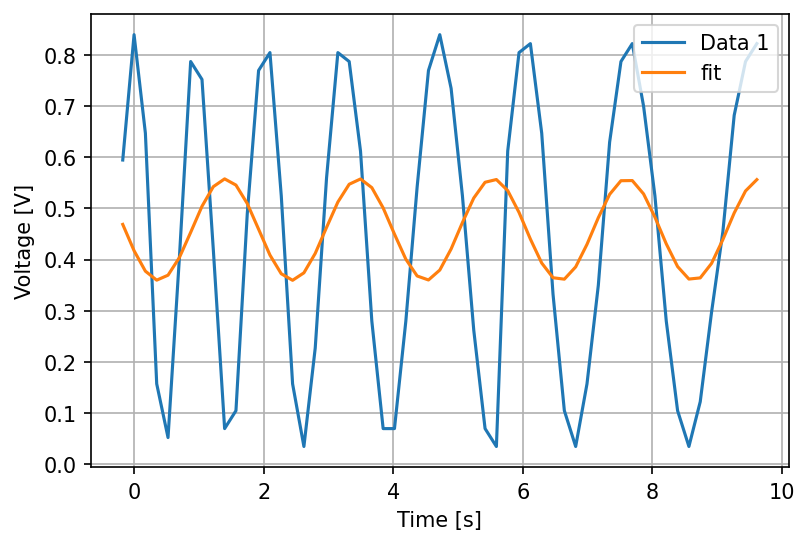

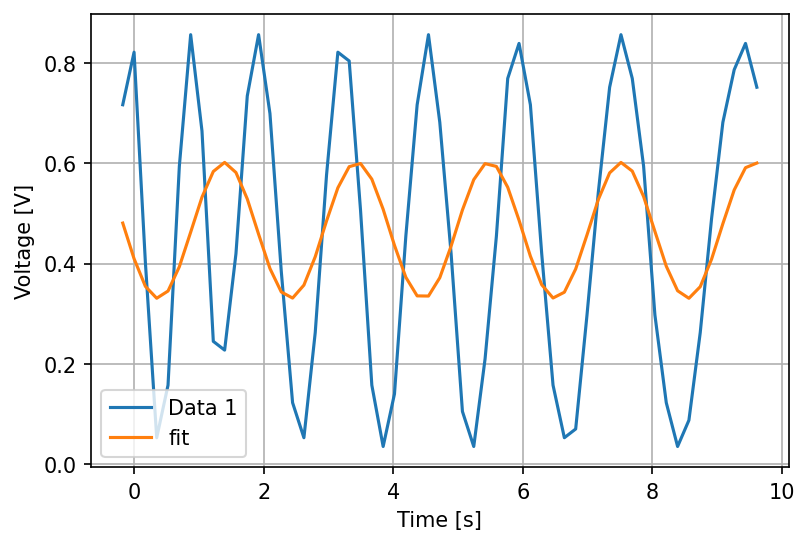

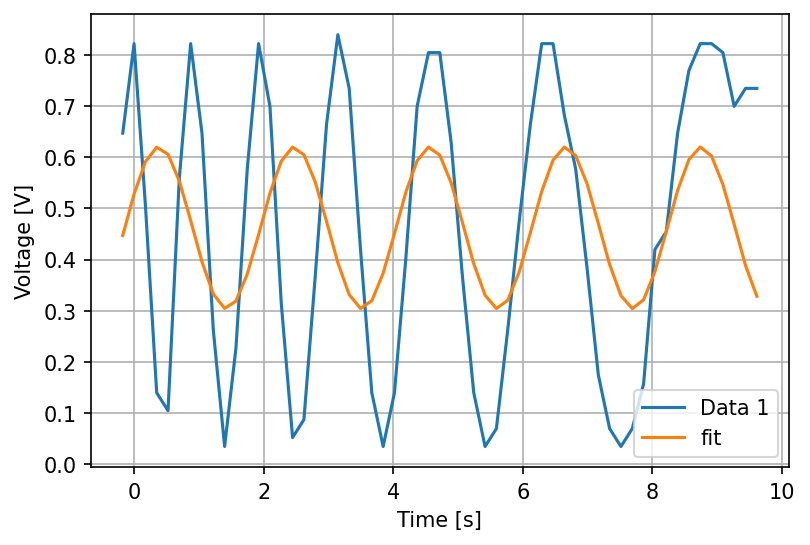

In [53]:
a_guess = 2.4
n_guess = 3
phi_guess = 0
c_guess = 0.5

p0_1= [a_guess, n_guess, phi_guess, c_guess]

def a_fit(x,*p): #define fitting function
    a=p[0]
    n=p[1]
    phi=[2]
    c = p[3]
    return a * (np.cos(n*x+phi))+c

pcov_list=[]

for Data,Data_name in zip(Data_list,Data_names):
    plt.figure() #plot raw data
    Time=Data[:,0]
    V2, V2_index = np.unique(Data[:, 2], return_index = True)
    V1 = np.array([Data[:, 1][i] for i in V2_index])
    plt.plot(V2, V1, '-', label='Data 1')
    #plt.plot(Time,V2, label='Data 2')
    plt.xlabel('Time [s]')
    plt.ylabel('Voltage [V]')
    
    # If you want old code replace V2 with time, V1 with V1 + V2 and remeber to adjust V2 and V1 to the right data coloumns.
    
    #Do fit to first sine wave, make guesses on amplitide with max(V1)-min(V1), make guess based on frequency written in Data_name float(Data_name[24:27])
    popt1, pcov1 = sp.curve_fit(a_fit, V2, V1, p0_1) #add them together (v1+v2) to see how the combined wave intensity is
    #plt.plot(Time, a_fit(Time, *p0_1), '-', label= 'guess')
    plt.plot(V2, a_fit(V2, *popt1),'-',label='fit')
    plt.grid()
    plt.legend()
    pcov_list.append(pcov1)

In [52]:
V2, V2_index = np.unique(Data[:, 2], return_index = True)
V1 = np.array([Data[:, 1][i] for i in V2_index])
V1

array([0.6468381 , 0.8216658 , 0.5069513 , 0.1398253 , 0.1048843 ,
       0.5594242 , 0.8216658 , 0.6468381 , 0.2621801 , 0.03494094,
       0.2272392 , 0.5768947 , 0.8216658 , 0.6992495 , 0.314653  ,
       0.05241142, 0.08735237, 0.367126  , 0.6643085 , 0.8391363 ,
       0.734252  , 0.4195374 , 0.1398253 , 0.03494094, 0.1398253 ,
       0.4020669 , 0.6992495 , 0.8041338 , 0.8041338 , 0.6293676 ,
       0.367126  , 0.1398253 , 0.03494094, 0.06988189, 0.2621801 ,
       0.4720103 , 0.6643085 , 0.8216658 , 0.8216658 , 0.681779  ,
       0.5768947 , 0.3845965 , 0.1747662 , 0.06988189, 0.03494094,
       0.06988189, 0.1572958 , 0.4195374 , 0.4545399 , 0.6468381 ,
       0.7691929 , 0.8216658 , 0.8216658 , 0.8041338 , 0.6992495 ,
       0.734252  , 0.734252  ])

In [45]:
a = (1/4)*c_light*eps0
b = (2*np.pi)/(600e-9) 

a_guess = a*2
k_guess = 2
c_guess = 0

p0_1= [a_guess,k_guess, c_guess]

def Intensity_fit(v,*p): #define fitting function
    a=p[0]
    k = p[1]
    c = p[2]
    return a * (1+np.cos(b*2*k*v))+c

mean_data = []
v1_data = []
v2_data =[]
for i in Data_list:
    v1_data.append(i[1])
    v2_data.append(i[2])

len(v1_data)

v1_mean = np.mean(v1_data[1])
v2_mean = np.mean(v2_data[2])




In [42]:
len(v1_data)

30

/tmp/ipykernel_999/1995741177.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure() #plot raw data


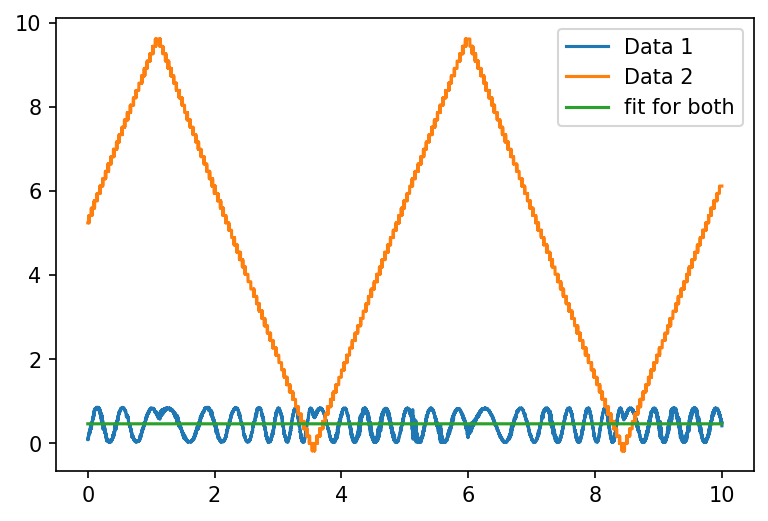

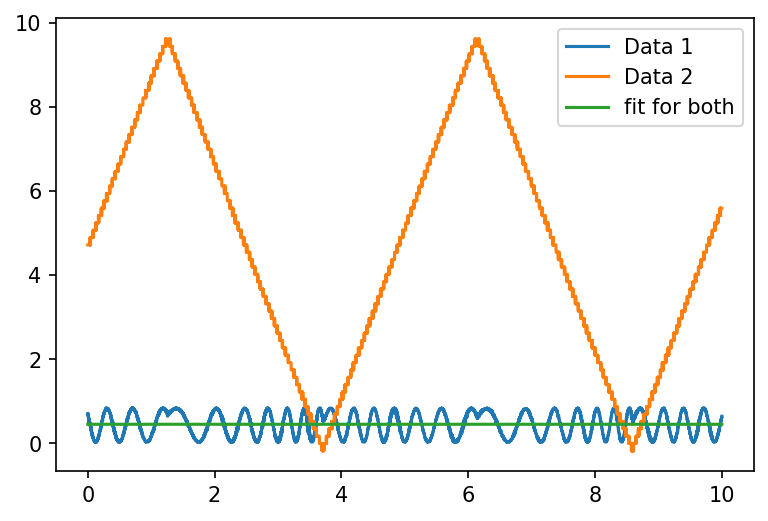

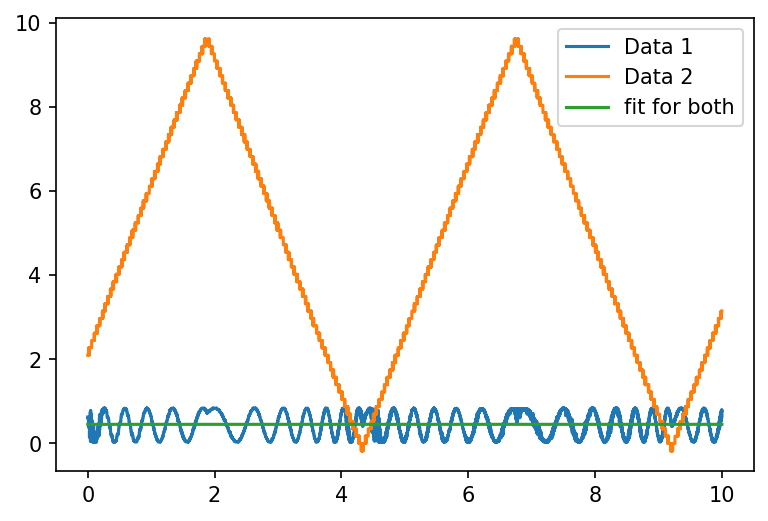

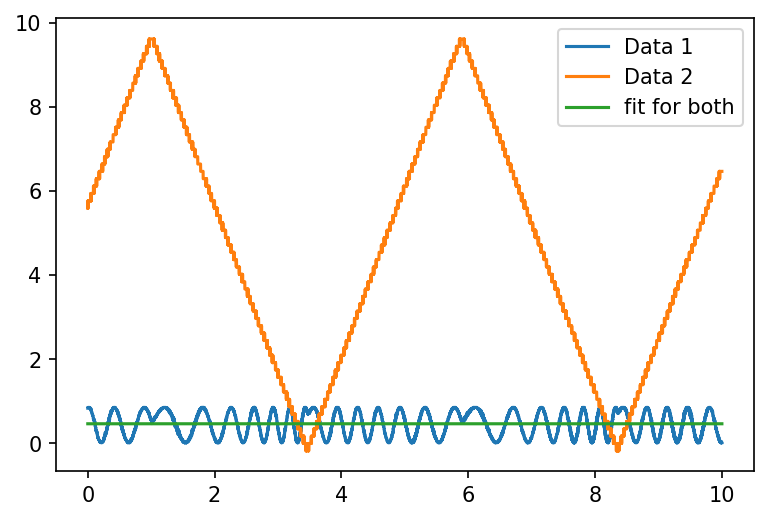

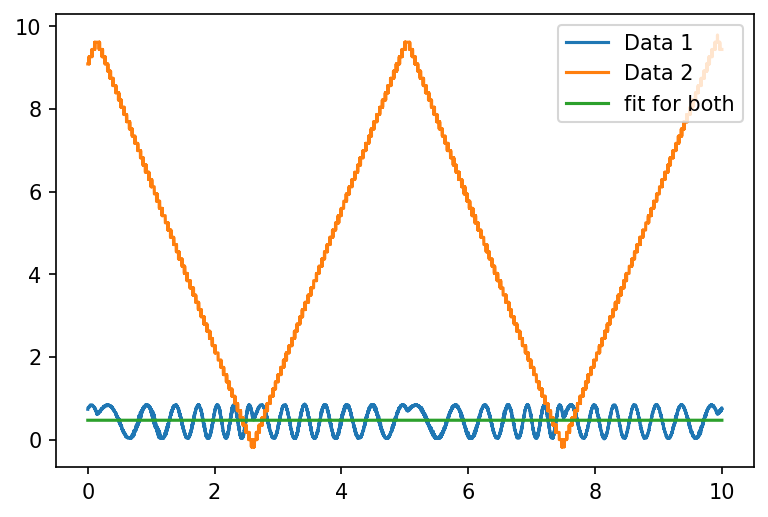

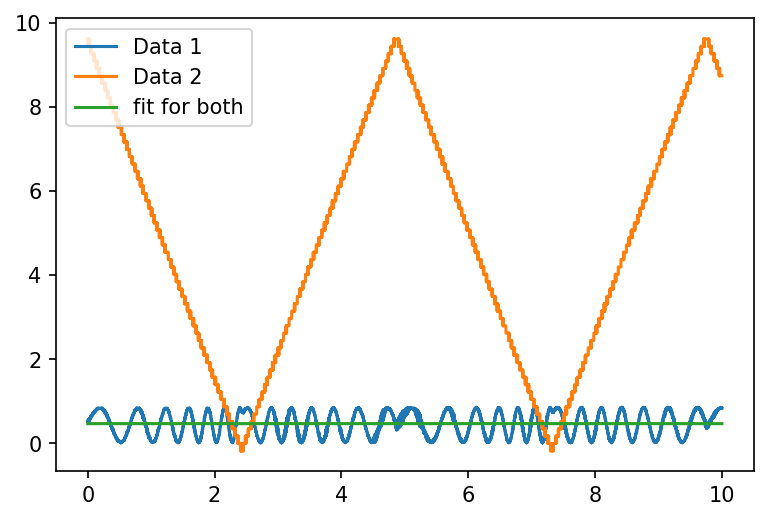

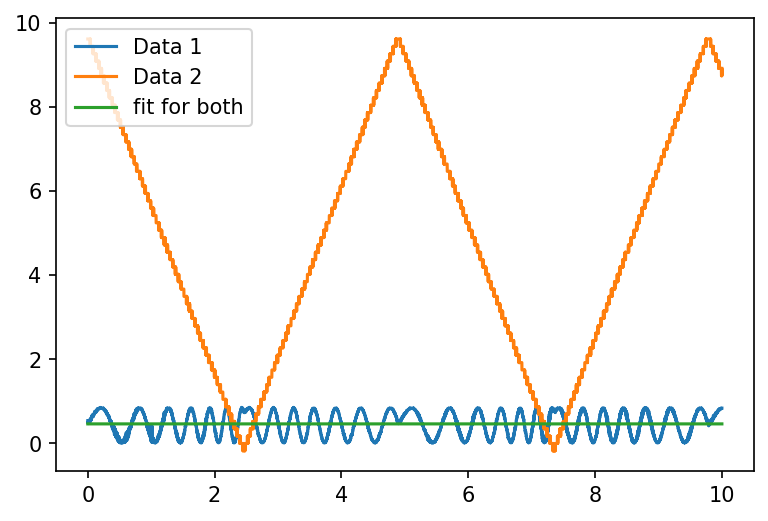

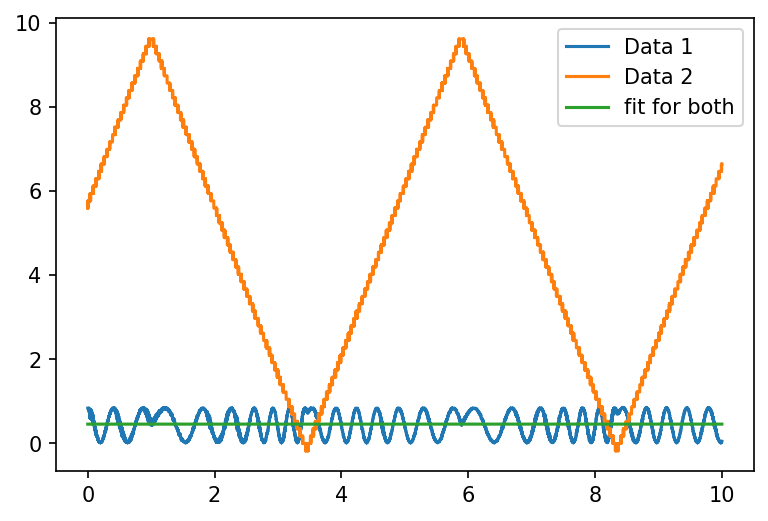

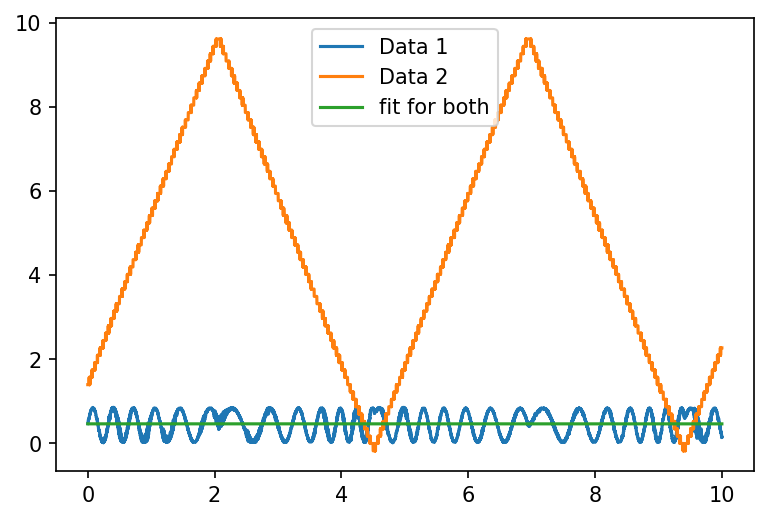

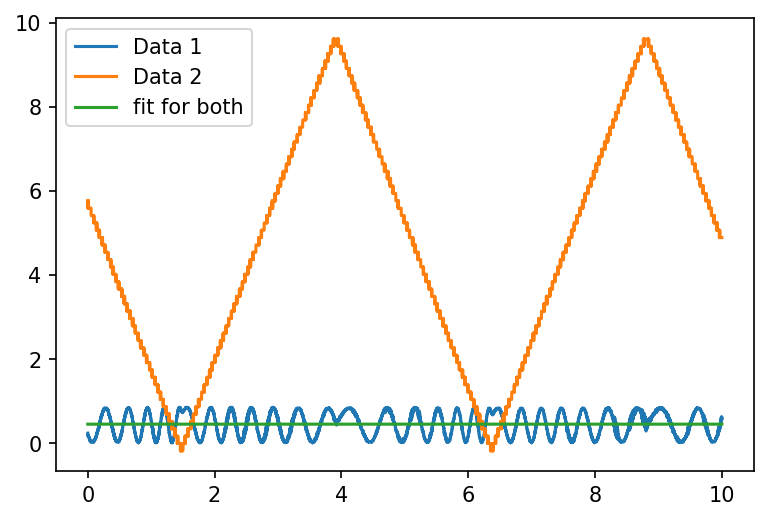

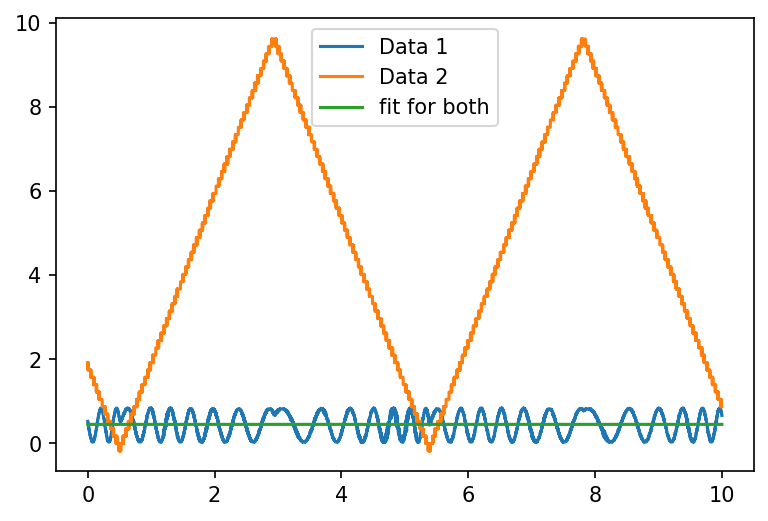

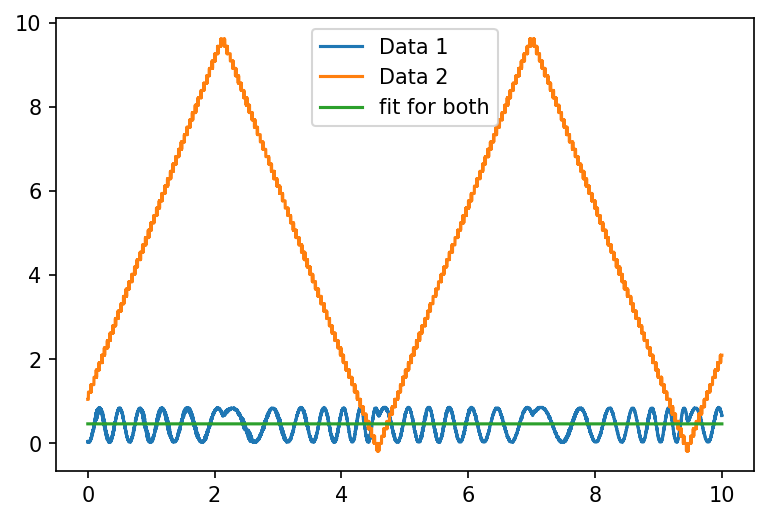

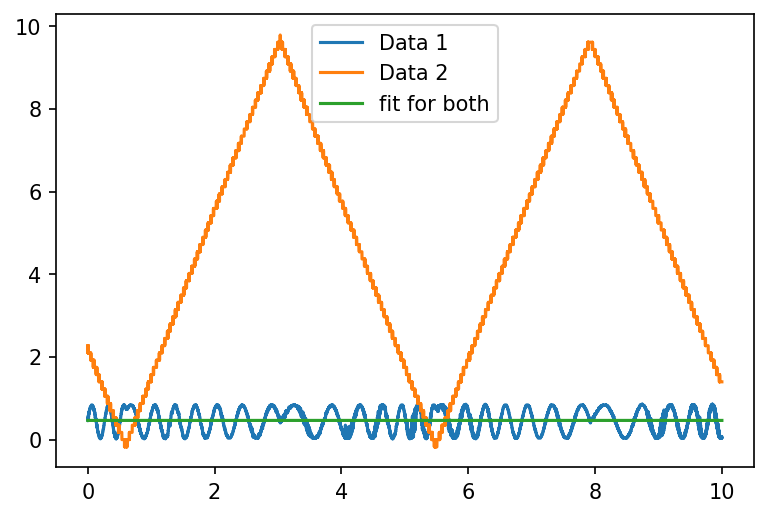

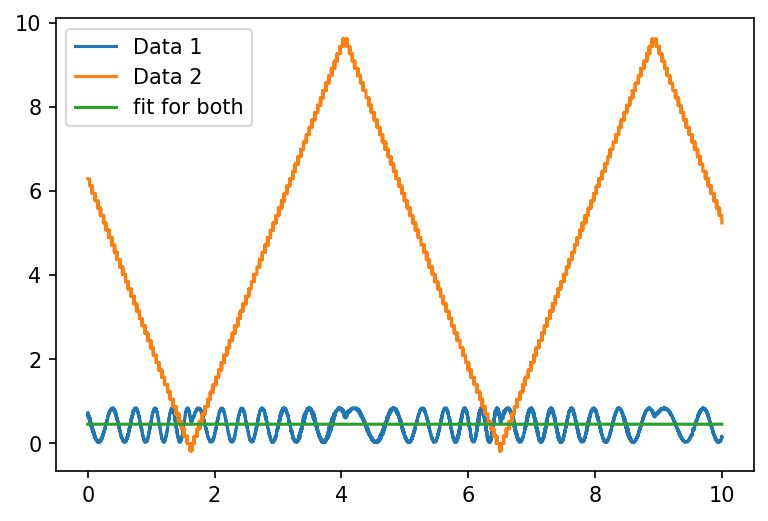

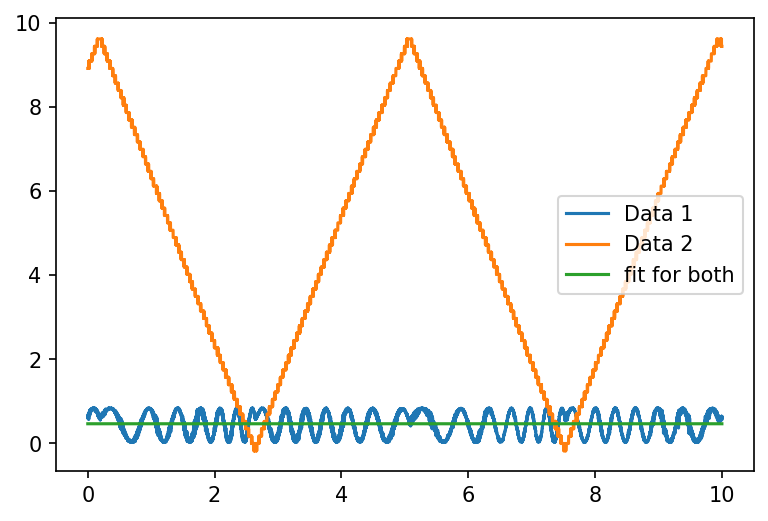

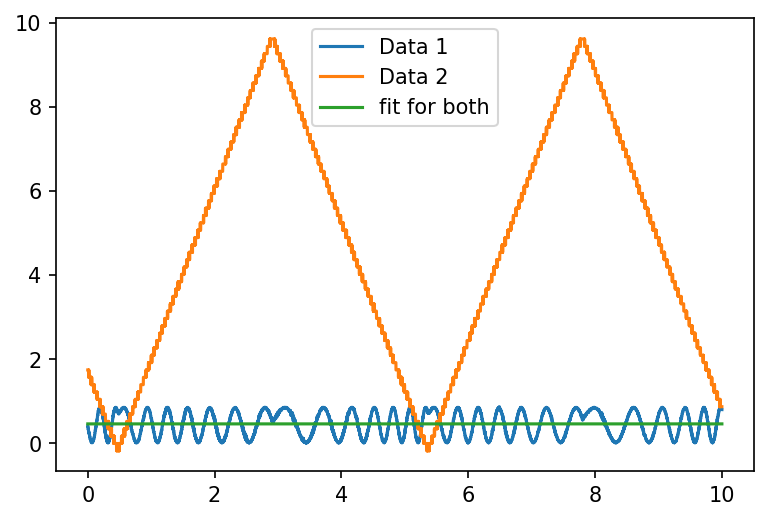

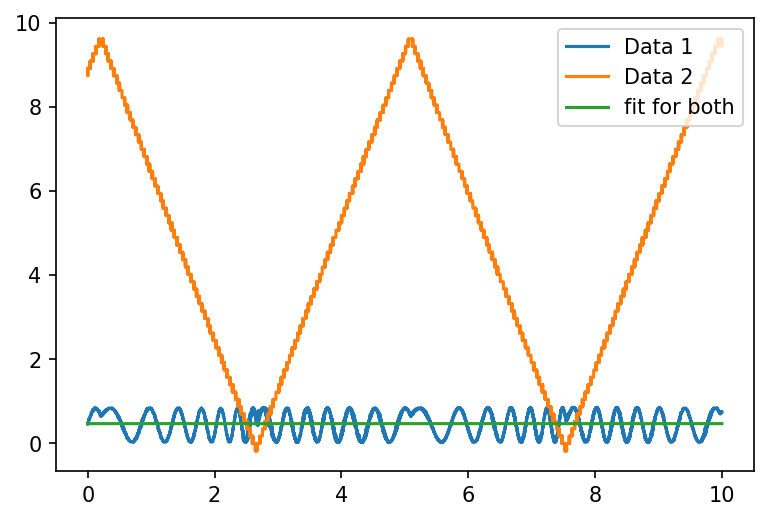

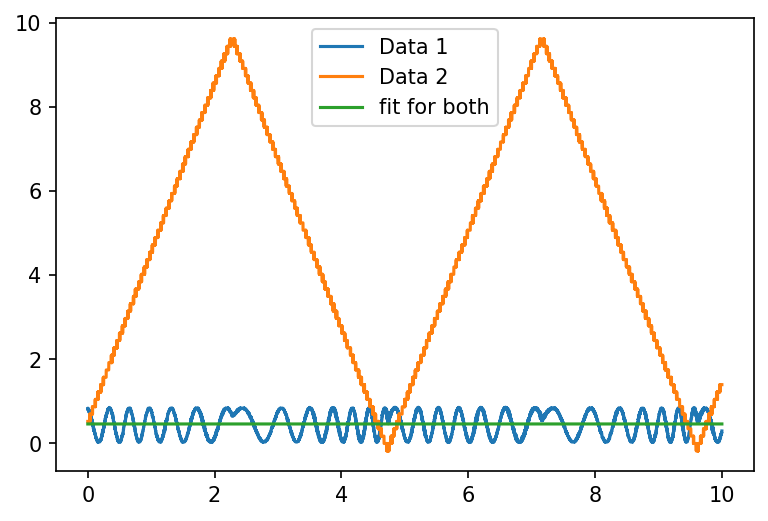

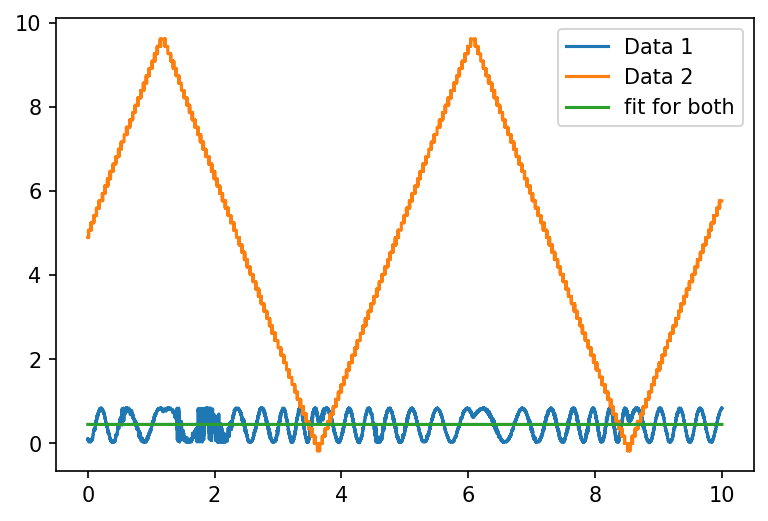

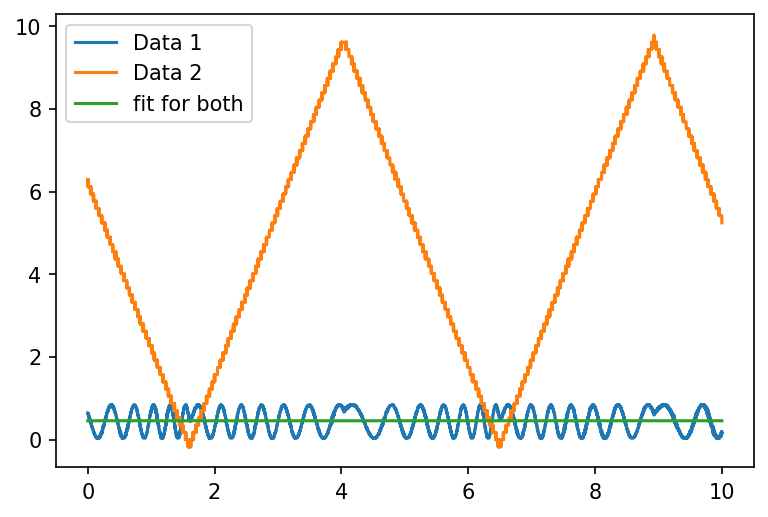

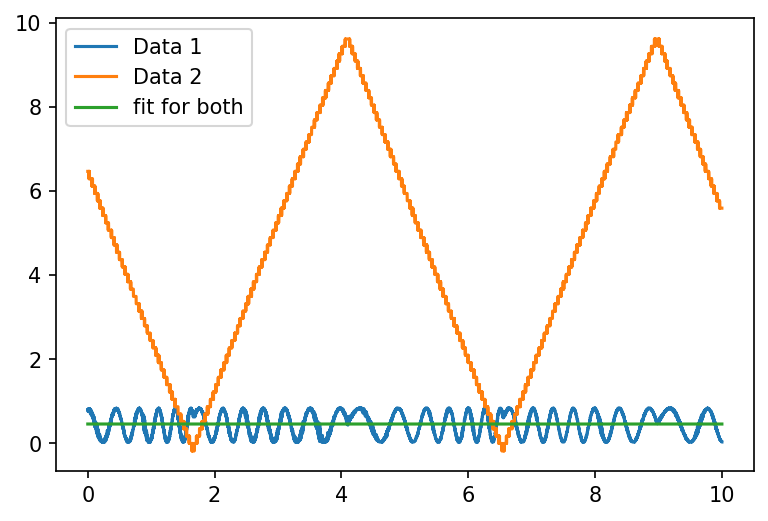

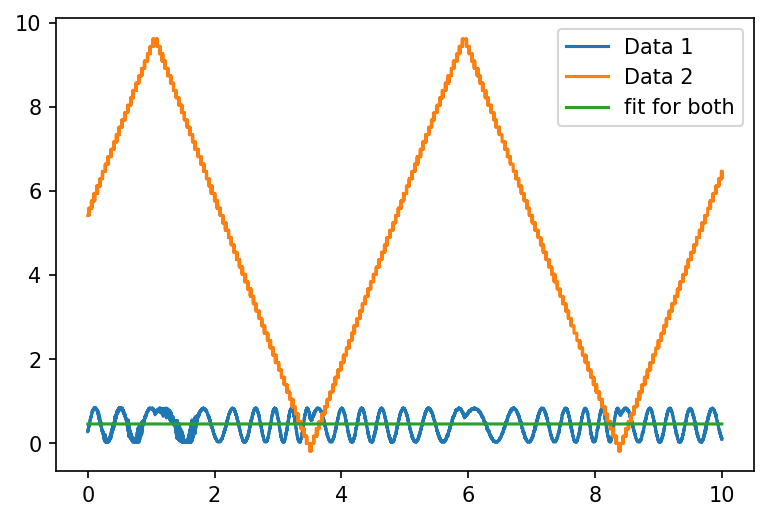

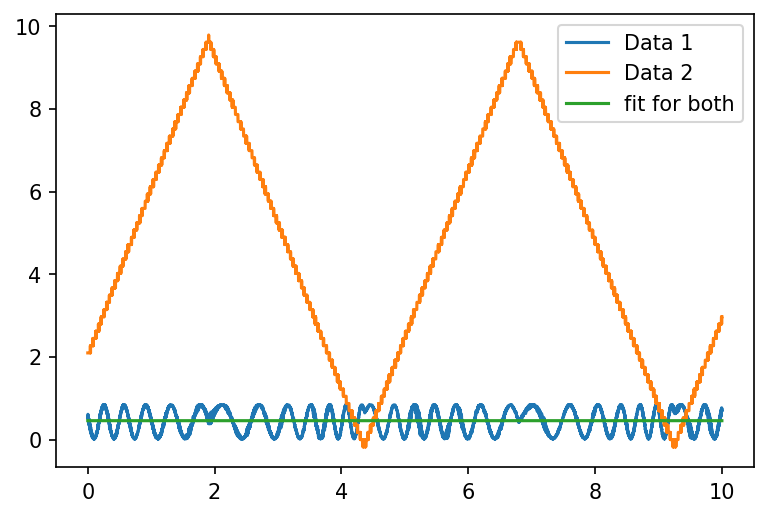

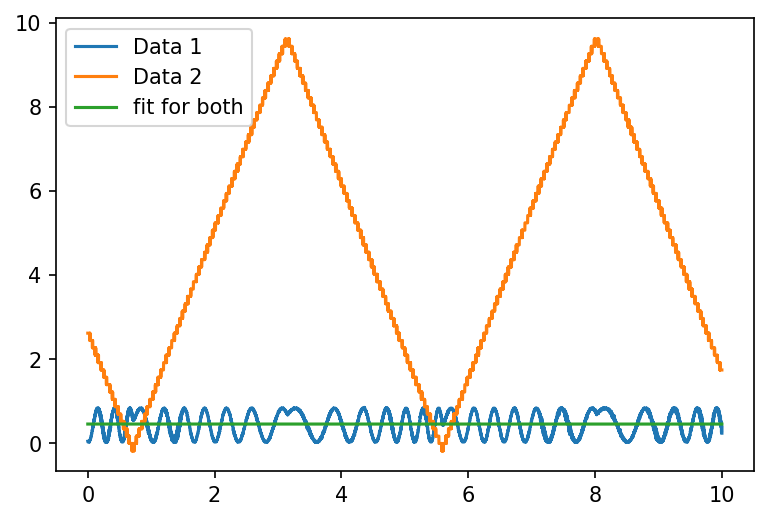

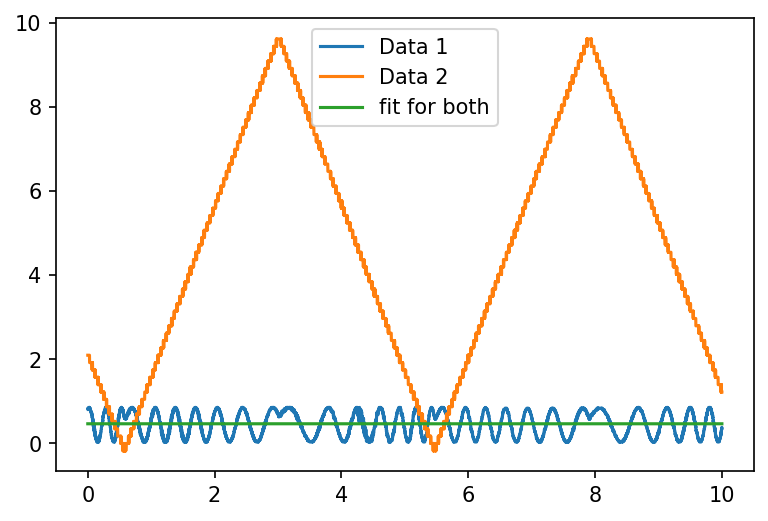

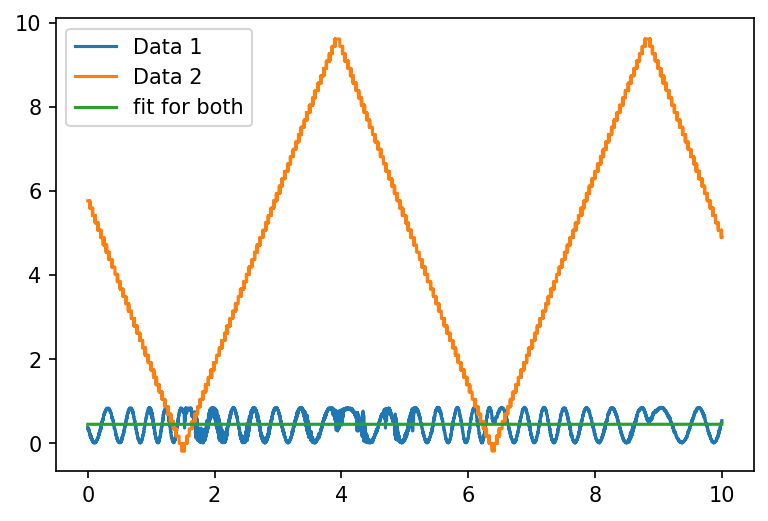

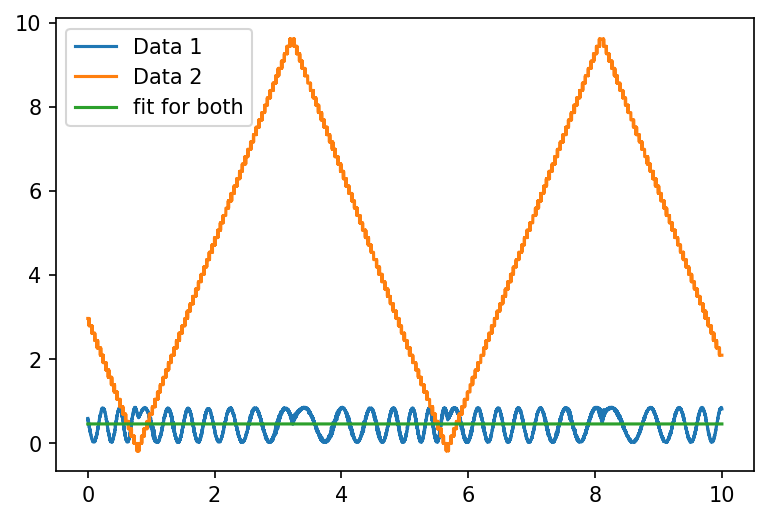

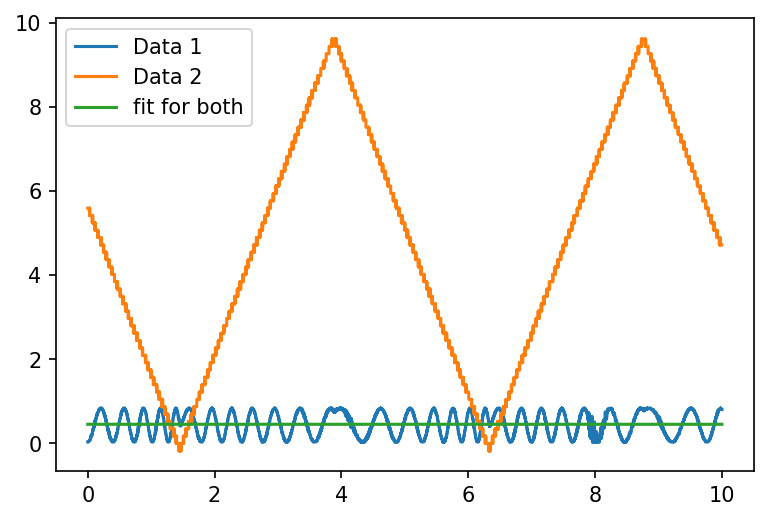

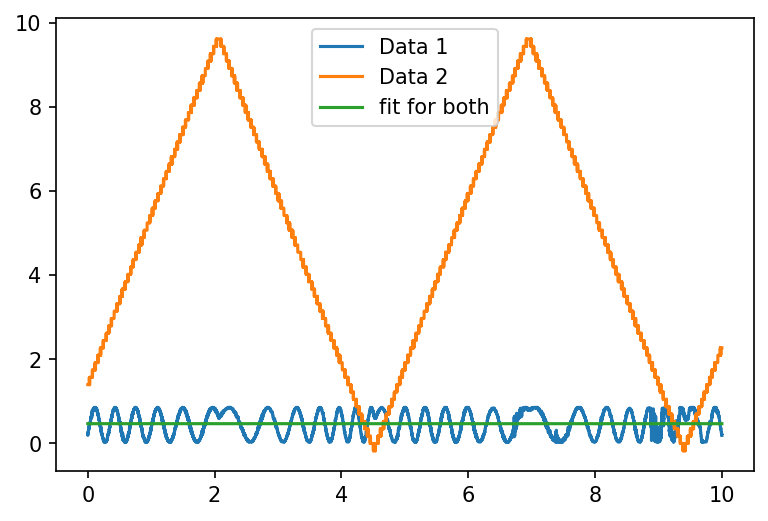

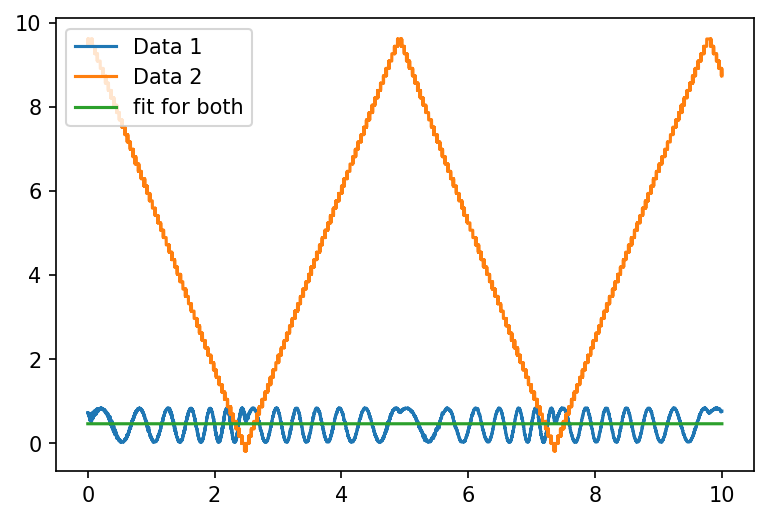

In [44]:
for Data,Data_name in zip(Data_list,Data_names):
    plt.figure() #plot raw data
    Time=Data[:,0]
    V1=Data[:,1]
    V2=Data[:,2]
    plt.plot(Time, V1, '-', label='Data 1')
    plt.plot(Time,V2, label='Data 2')
    #plt.xlabel('Time [s]')
    #plt.ylabel('Voltage [V]')
    
    #Do fit to first sine wave, make guesses on amplitide with max(V1)-min(V1), make guess based on frequency written in Data_name float(Data_name[24:27])
    popt1, pcov1 = sp.curve_fit(Intensity_fit, Time, V1, p0 = [a_guess, k_guess, c_guess]) #add them together (v1+v2) to see how the combined wave
    plt.plot(Time, Intensity_fit(V2 ,*popt1),'-',label='fit for both')
    
    plt.legend()

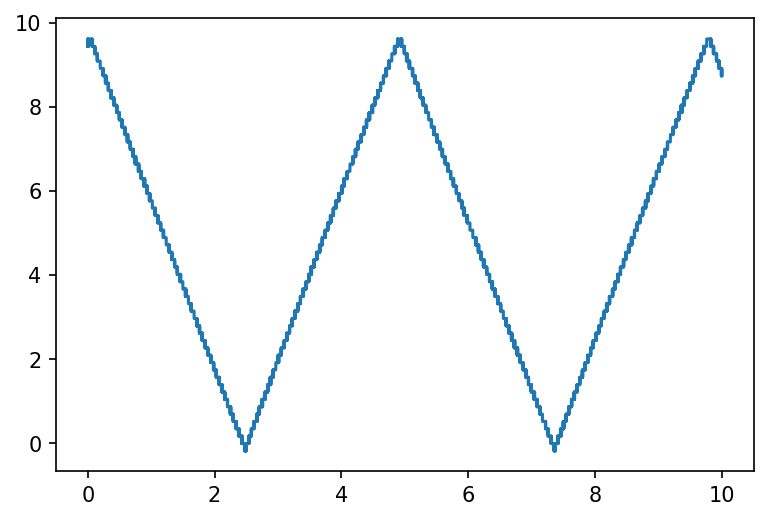

In [58]:
Time = Data[:,0]
V2 = Data[:,2]

plt.plot(Time, V2)


In [79]:
import numpy as np

# Assuming filtered_data contains your filtered datasets where V2 is increasing
time_between_min_max = []

for data in Data_list:
    V2_values = data[:, 2]  # Assuming V2 is the third column
    
    # Find the index of the first occurrence of the minimum and maximum points
    min_index = np.argmin(V2_values)
    max_index = np.argmax(V2_values)
    
    # Get the corresponding time values
    time = data[:, 0]
    
    # Calculate the length of time between the bottom and the top
    time_diff = time[max_index] - time[min_index]
    
    time_between_min_max.append(time_diff)

print("Length of time between the bottom and the top for each dataset:", time_between_min_max)


Length of time between the bottom and the top for each dataset: [-2.47401963, -2.47068627, -2.47068627, -2.4726862900000004, 7.352058339999999, -2.41201914, -2.44601941, -2.47735299, -2.4773529899999995, 2.41068579, 2.41001912, -2.4666862400000005, 2.45601949, 2.4100191300000002, -2.47135294, 2.41668584, -2.4706862800000002, -2.4700195899999997, -2.4786863400000003, 7.35139166, 2.41735251, -2.47201962, -2.43401931, 2.41668584, 2.42335256, 2.41468583, 2.41201913, 2.41535249, -2.4773529899999995, -2.47068627]


In [80]:
import numpy as np

# List to store the data between the first min and max points for each dataset
data_between_min_max = []

for data in Data_list:
    # Assuming V2 is the third column
    V2_values = data[:, 2]
    
    # Find the index of the first occurrence of the minimum and maximum points
    min_index = np.argmin(V2_values)
    max_index = np.argmax(V2_values)
    
    # Determine the start and end indices for the data between the first min and max points
    start_index = min(min_index, max_index)
    end_index = max(min_index, max_index)
    
    # Extract the data between the first min and max points
    data_between_min_max.append(data[start_index:end_index + 1])

print("Data between the first min and max points for each dataset:", data_between_min_max)


Data between the first min and max points for each dataset: [array([[ 1.06600846,  0.7517225 ,  9.61122   ],
       [ 1.06667513,  0.7517225 ,  9.436516  ],
       [ 1.0673418 ,  0.734252  ,  9.436516  ],
       ...,
       [ 3.53869474,  0.7866634 ,  0.        ],
       [ 3.53936142,  0.7866634 ,  0.        ],
       [ 3.54002809,  0.7866634 , -0.1747047 ]]), array([[ 1.22534306,  0.7866634 ,  9.61122   ],
       [ 1.22600973,  0.7866634 ,  9.436516  ],
       [ 1.2266764 ,  0.7866634 ,  9.61122   ],
       ...,
       [ 3.69469598,  0.6643085 ,  0.        ],
       [ 3.69536265,  0.6468381 ,  0.        ],
       [ 3.69602933,  0.6468381 , -0.1747047 ]]), array([[ 1.84334796,  0.8216658 ,  9.61122   ],
       [ 1.84401463,  0.8216658 ,  9.436516  ],
       [ 1.8446813 ,  0.8216658 ,  9.436516  ],
       ...,
       [ 4.31270089,  0.7167815 ,  0.        ],
       [ 4.31336756,  0.7517225 ,  0.        ],
       [ 4.31403423,  0.7691929 , -0.1747047 ]]), array([[ 0.96734101,  0.681779  ,

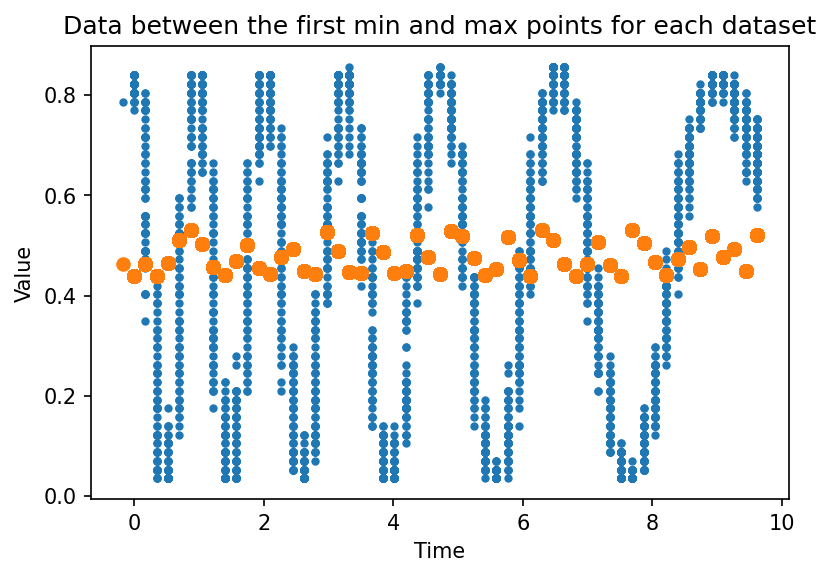

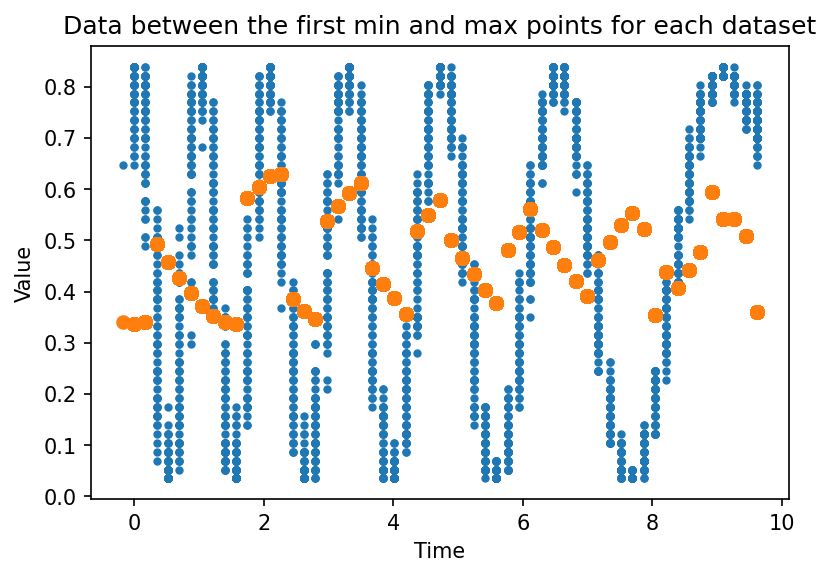

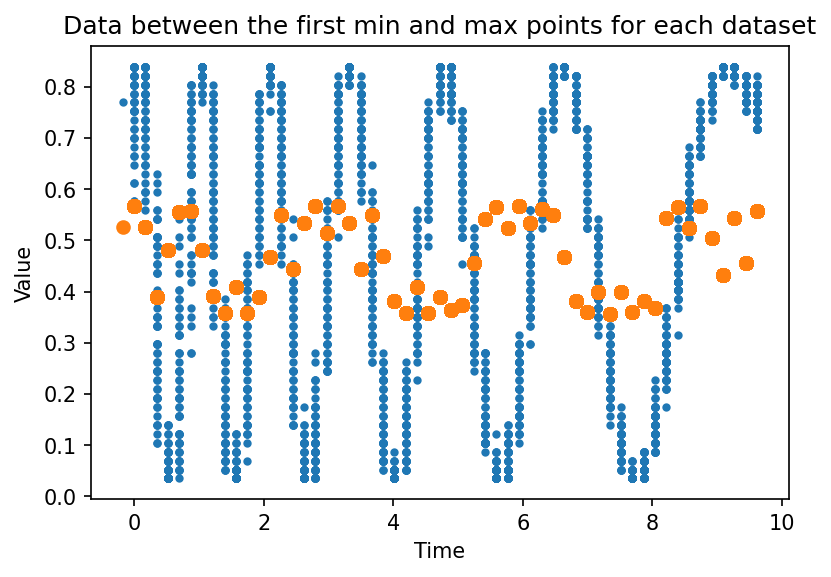

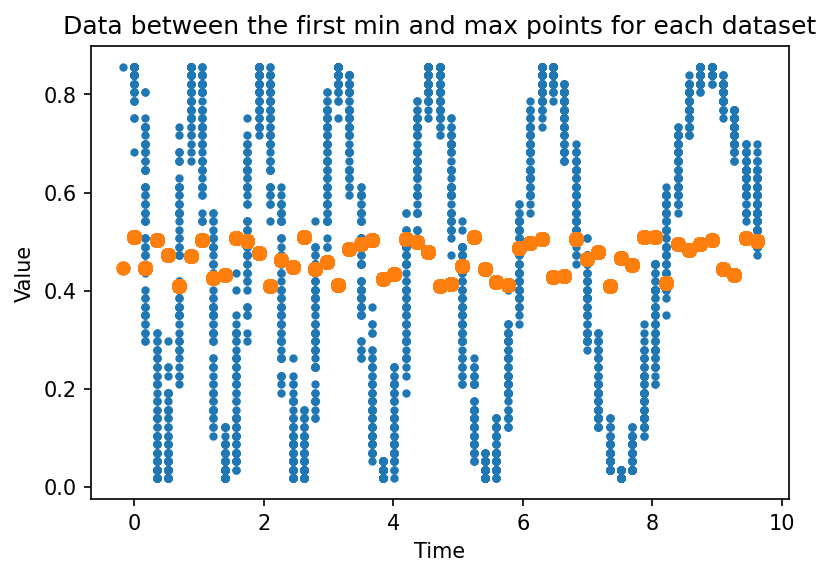

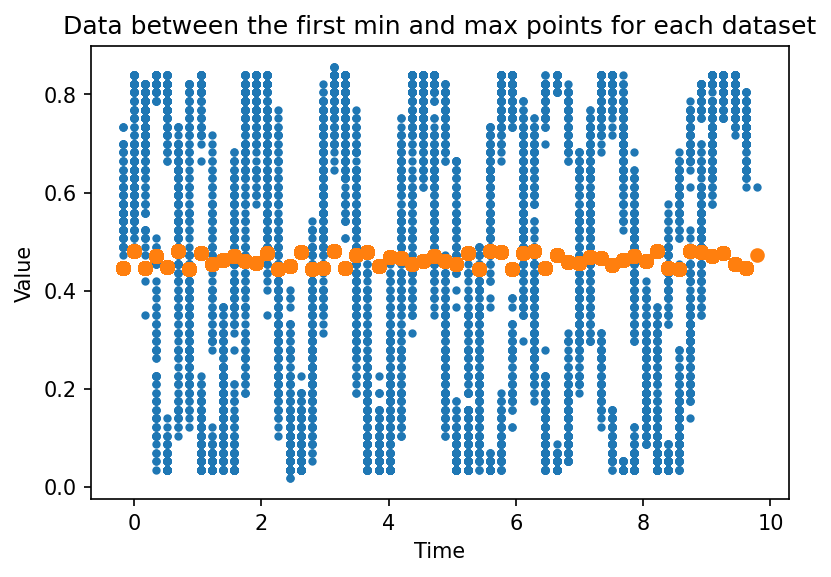

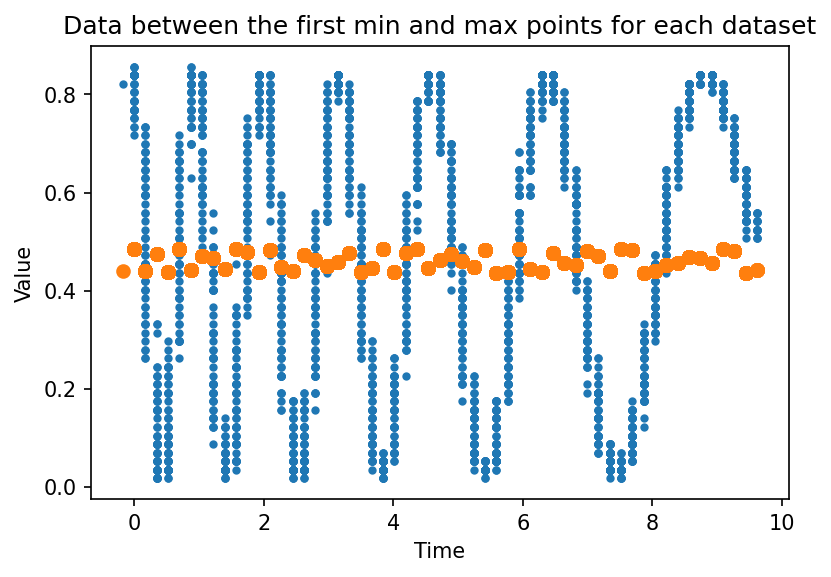

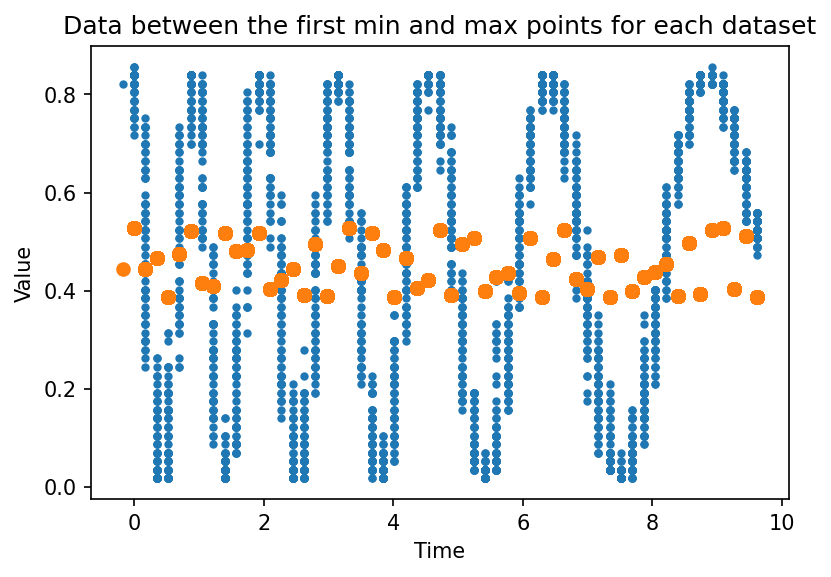

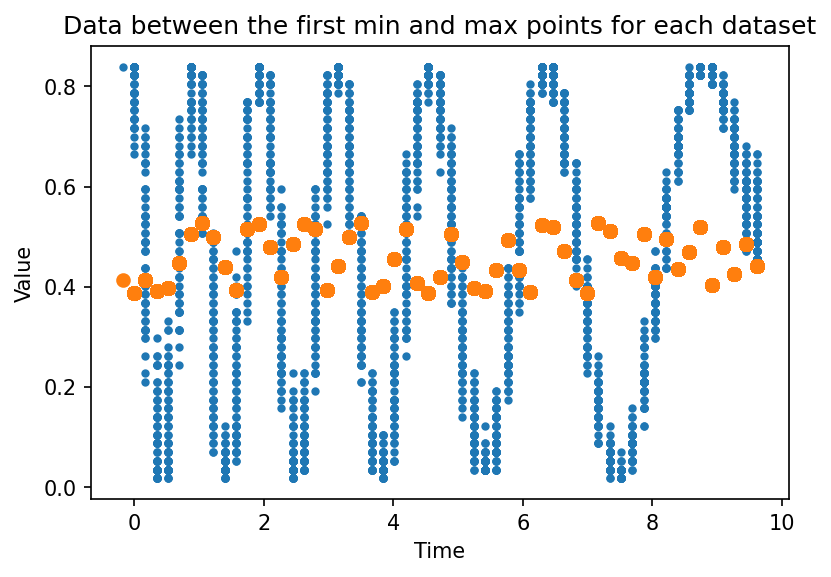

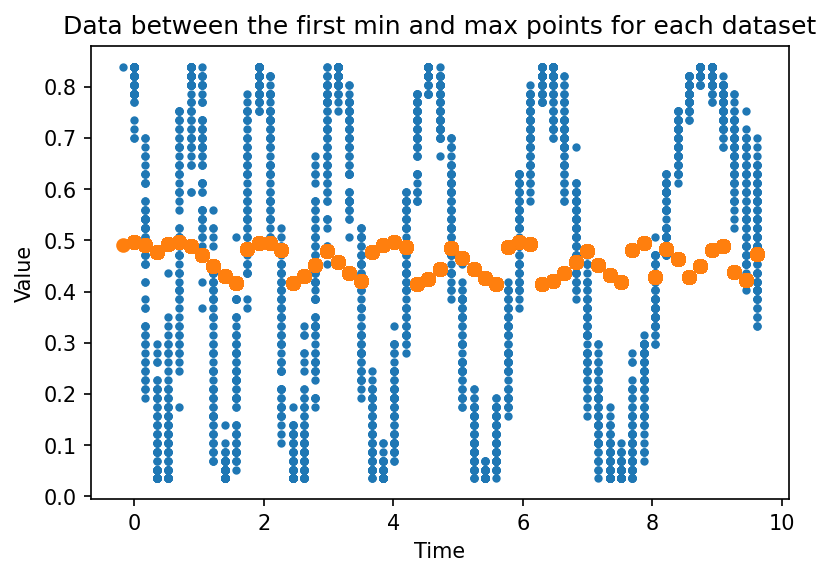

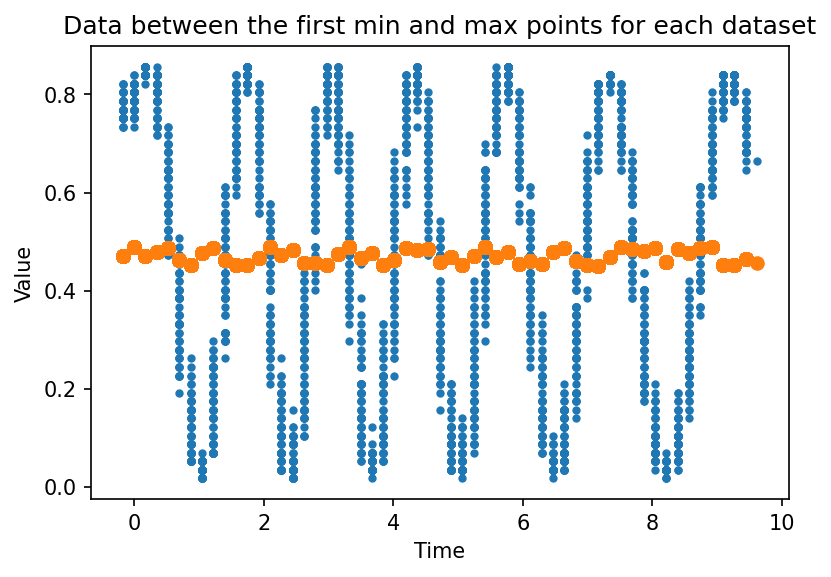

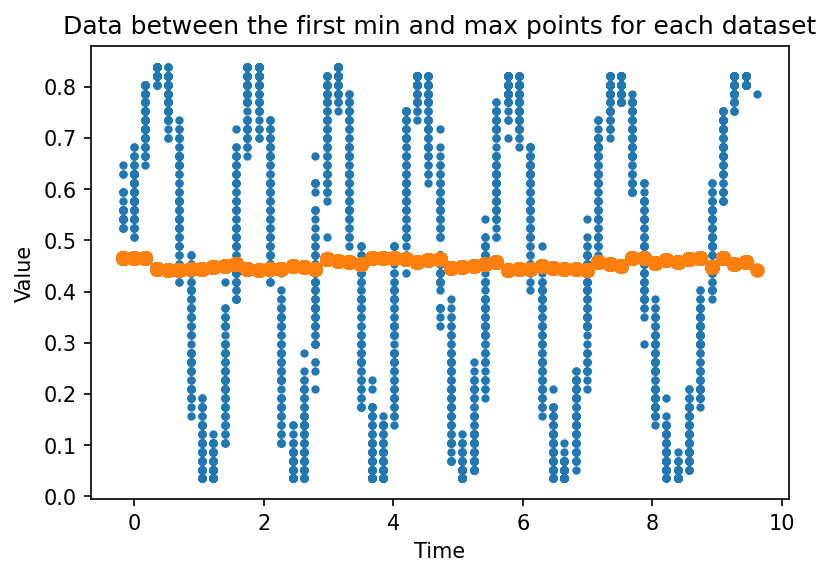

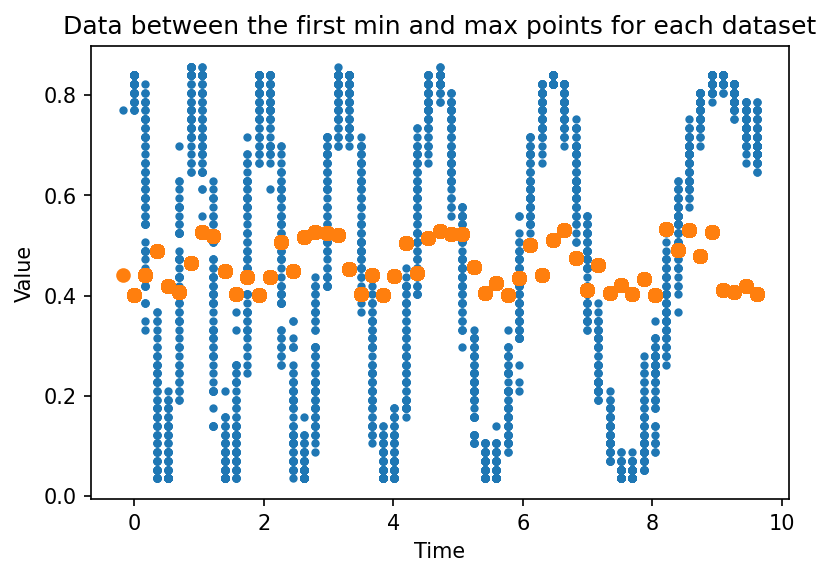

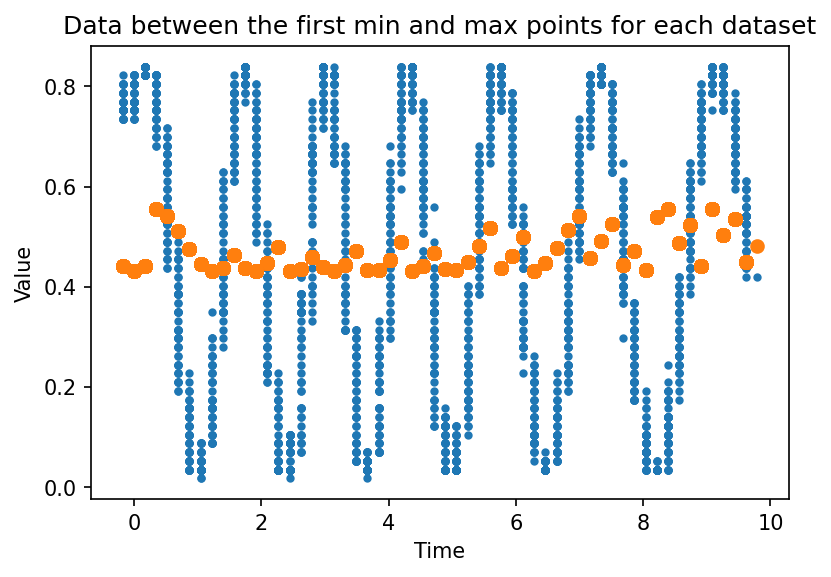

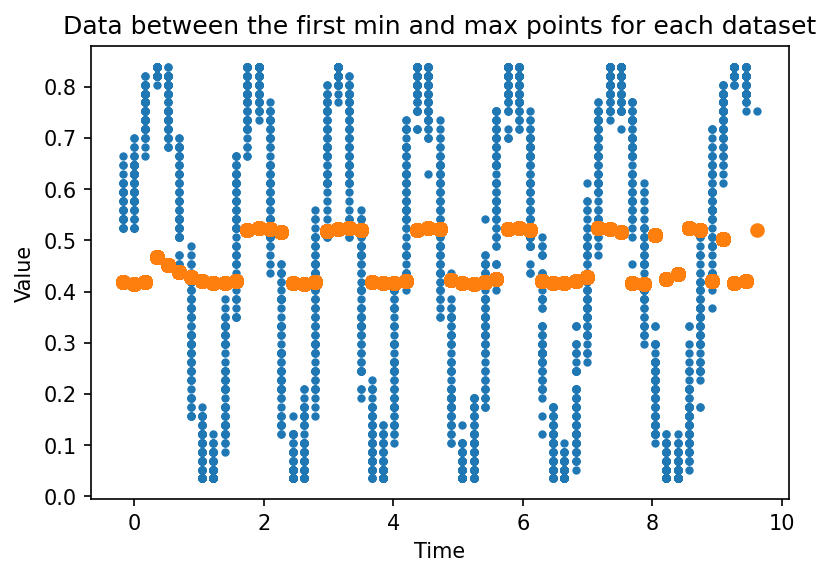

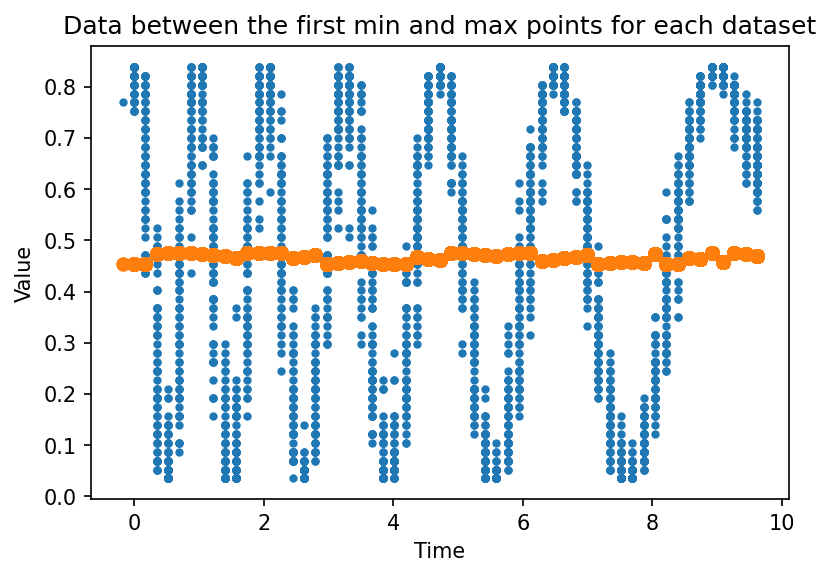

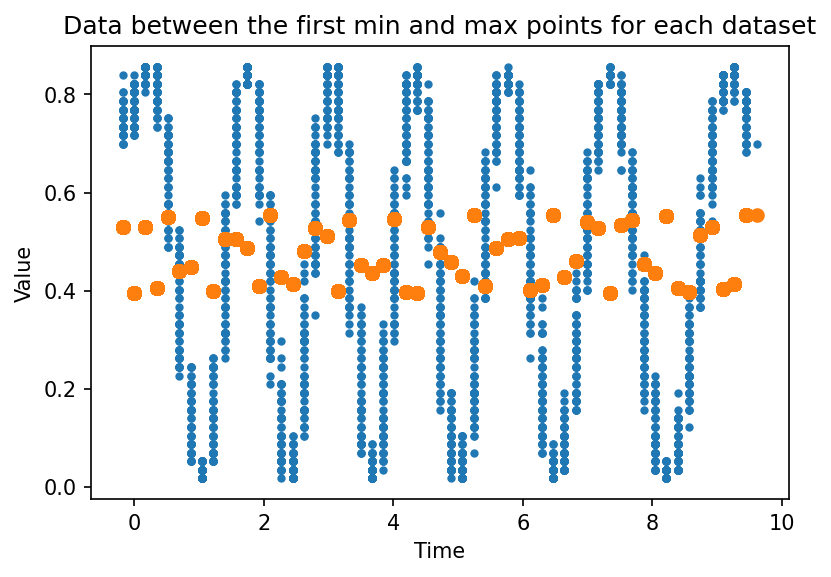

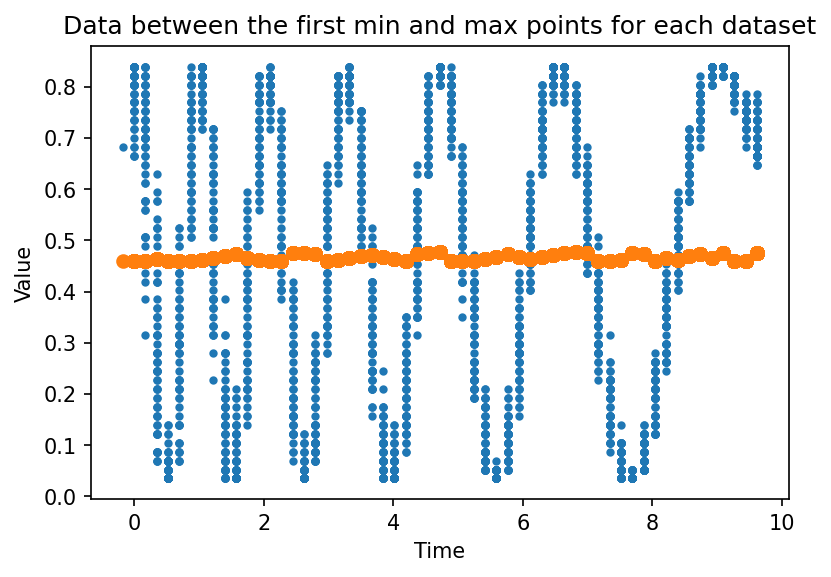

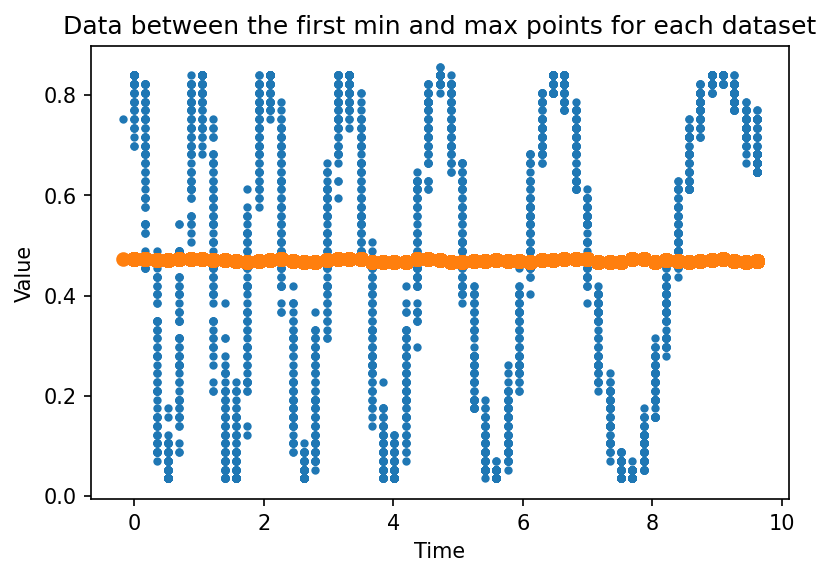

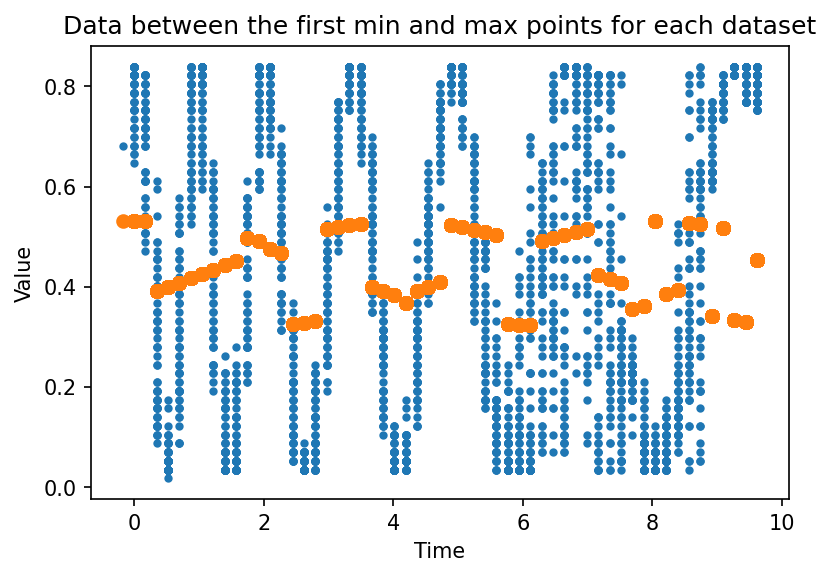

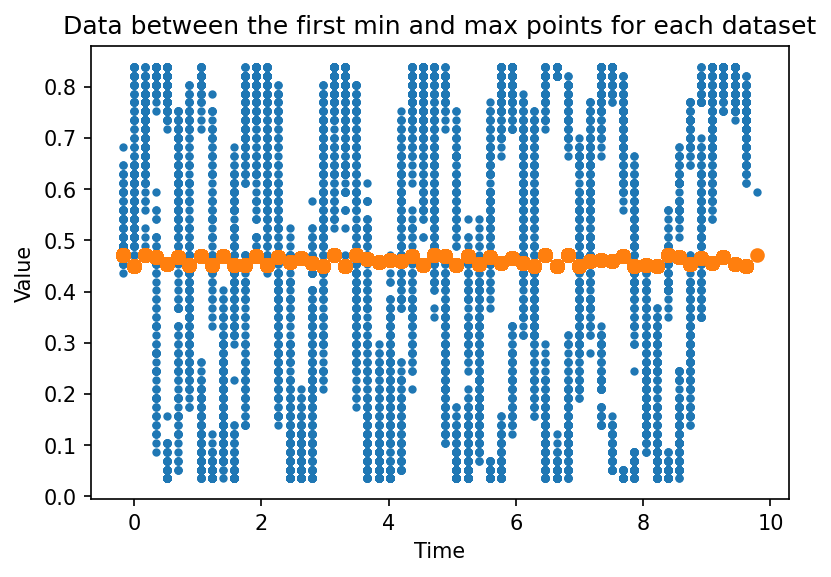

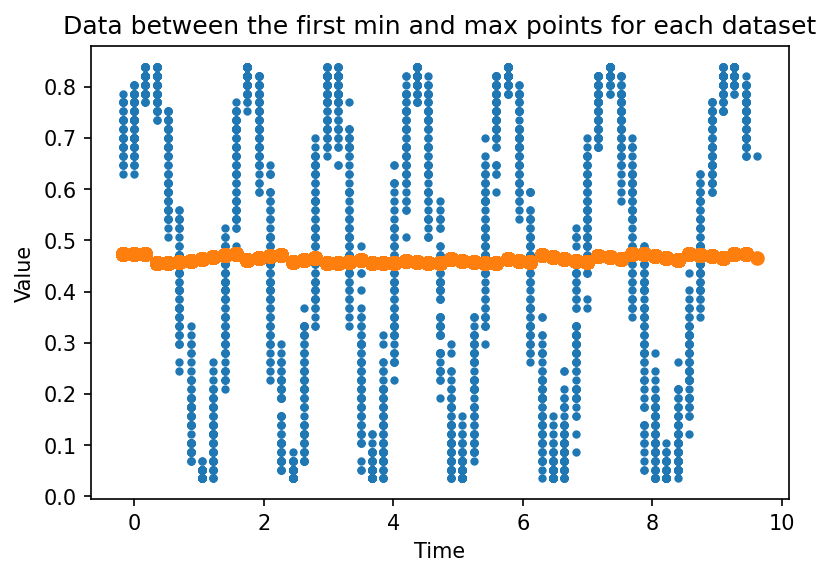

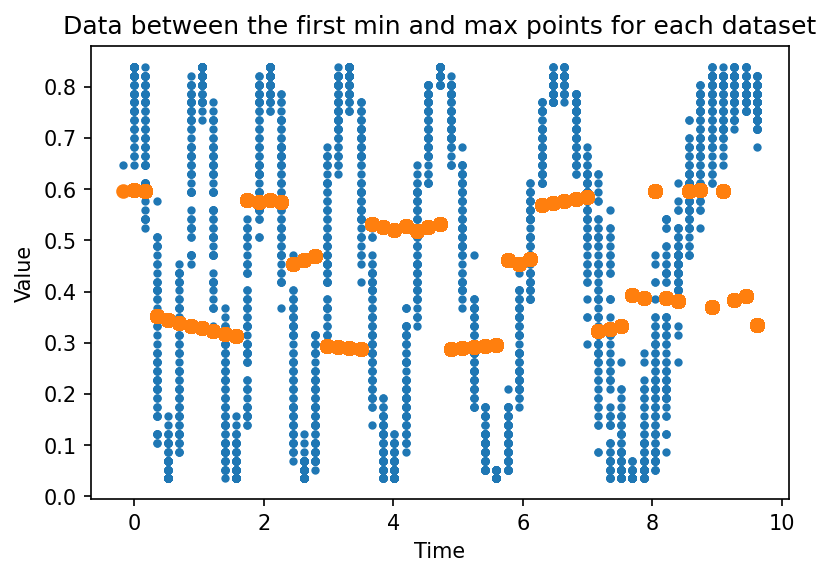

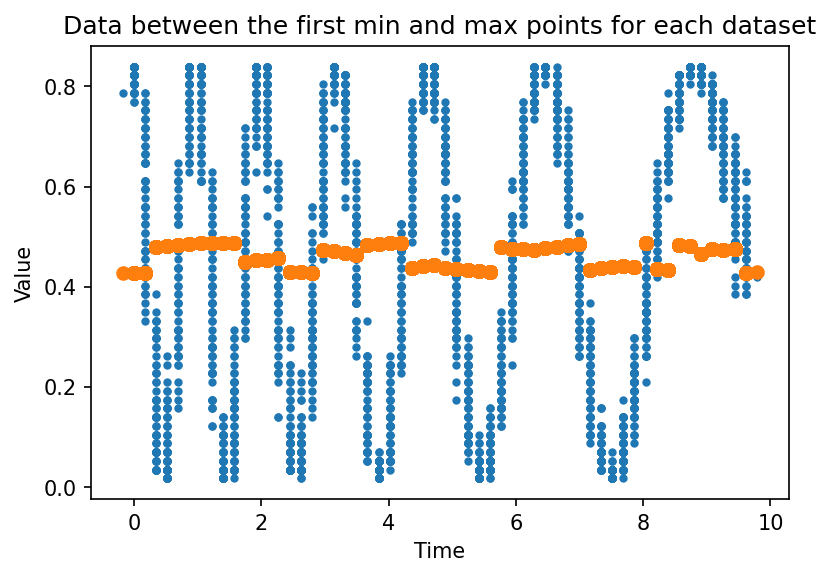

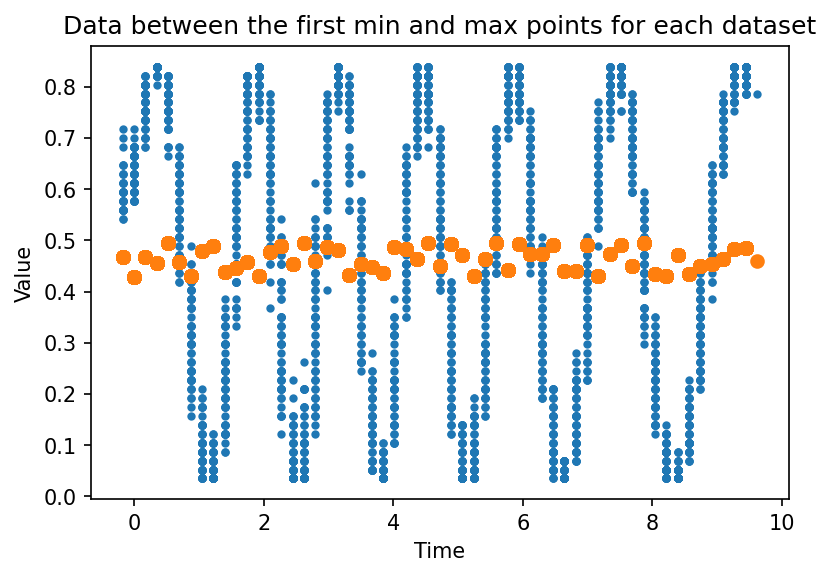

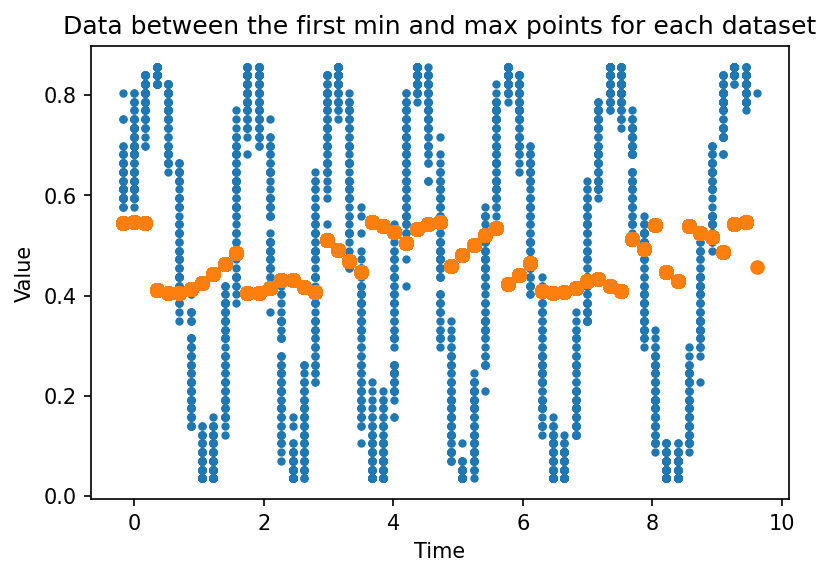

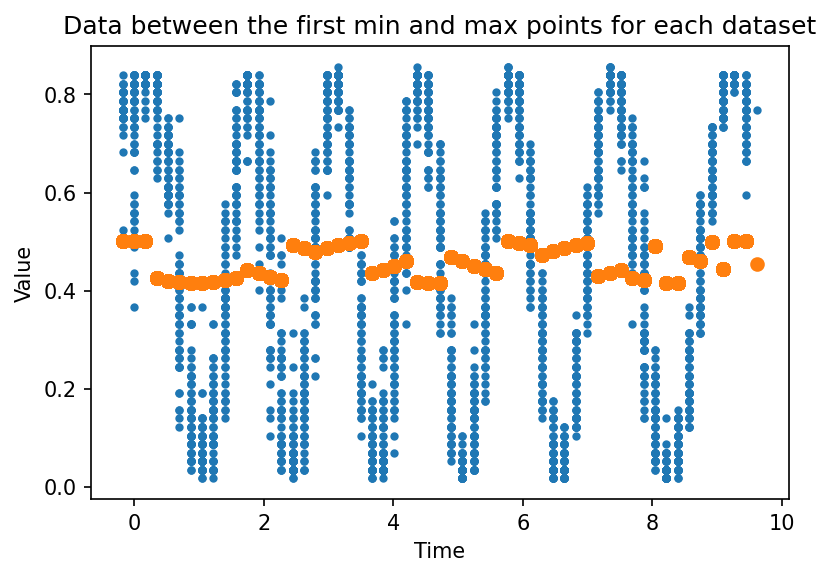

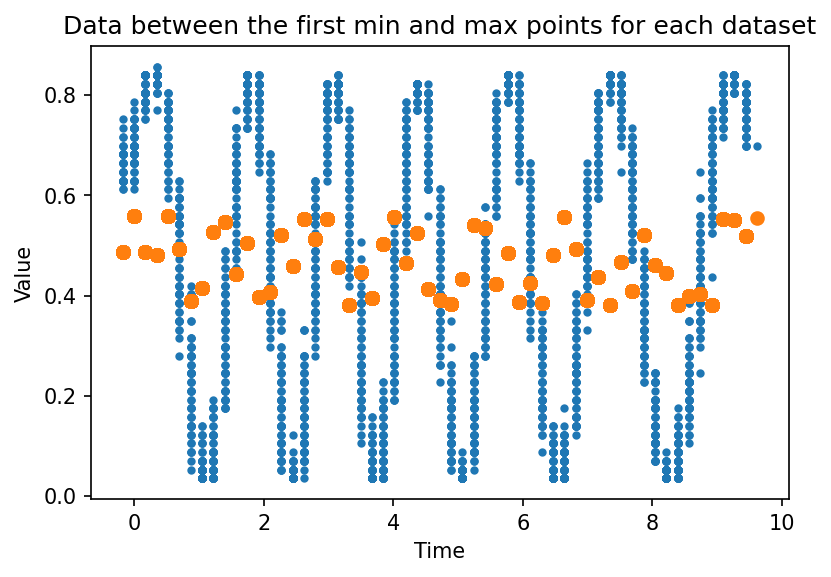

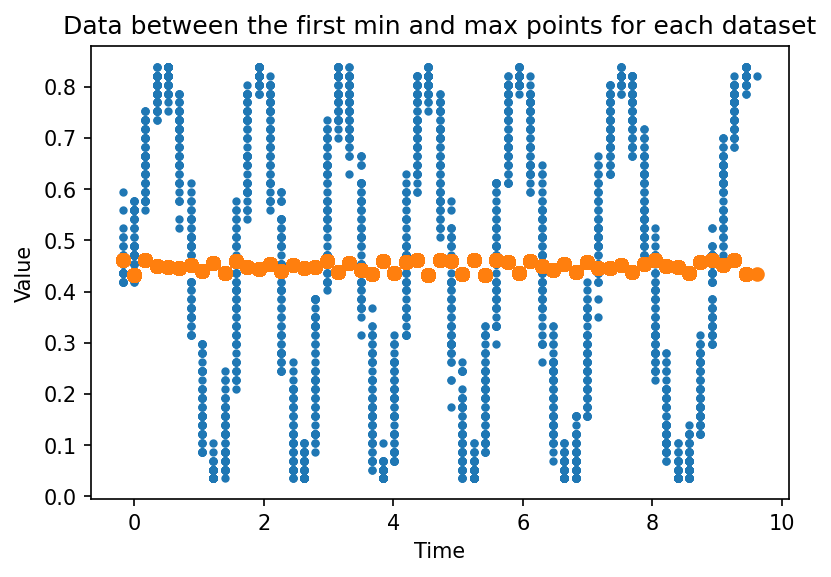

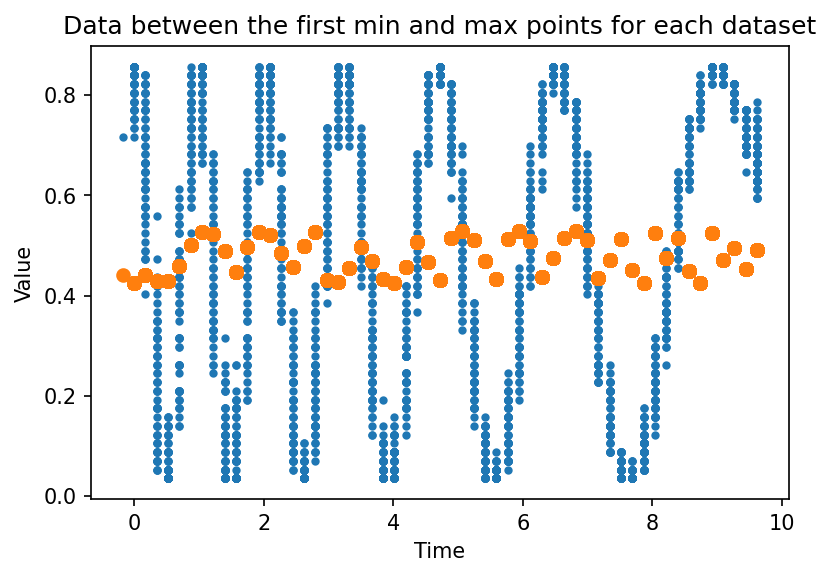

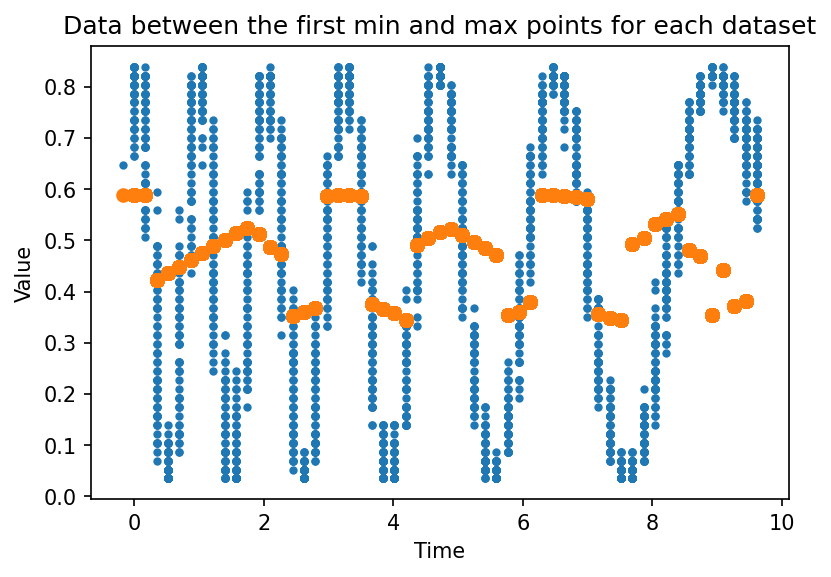

In [101]:
import matplotlib.pyplot as plt

a = (1/4)*c_light*eps0
b = (2*np.pi)/(600e-9) 

a_guess = a
k_guess = 2
c_guess = 1

p0_1= [a_guess, k_guess, c_guess]

def Intensity_fit(v,*p): #define fitting function
    a=p[0]
    k = p[1]
    c = p[2]
    return a * (1+np.cos(b*2*k*v))+c

# Plot the data between the first min and max points for each dataset
for data in data_between_min_max:
    plt.figure()
    time = data[:, 0]
    V1 = data[:, 1]  # Assuming V1 is the second column
    V2 = data[:, 2]  # Assuming V2 is the third column
    plt.plot(V2, V1,'.',label='V1')
    #plt.plot(time, V2, label='V2')

    popt, pcov = sp.curve_fit(Intensity_fit, V2, V1, p0=p0_1)
    plt.plot(V2, Intensity_fit(V2, *popt),'o',label='fit for both')

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Data between the first min and max points for each dataset')
#plt.legend()
    plt.show()

In [98]:
print(np.sqrt(pcov[0][0]))

0.01039699610436127
